## Import Dependencies

In [179]:
# Import packages
import pandas as pd
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import PolyLineTextPath
import folium.plugins as plugins
import datetime
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Read data

### Package data

In [2]:
new_package_data = pd.read_json('new_package_data.json')
new_package_data.head()

RouteID_15baae2d-bf07-4967-956a-173d4036613f  \
AH  {'PackageID_07017709-2ddd-4c6a-8b7e-ebde70a4f0...   
AK  {'PackageID_30d78e0b-3dfd-4123-a392-a187ee55c7...   
AN  {'PackageID_31472e01-c4ac-4281-b9ae-281a152f0d...   
AU  {'PackageID_180d6ed8-e08c-4a2a-972c-b0d6f1bd68...   
AV  {'PackageID_9b96689a-99ef-4fc3-9281-ad7442c746...   

         RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  \
AH  {'PackageID_6a8081fd-4eb8-4256-a15f-c2c5984739...   
AK  {'PackageID_b4db4da3-cf7d-43b9-88d3-d0bbe0f627...   
AN                                                NaN   
AU  {'PackageID_2baf8350-32fe-4b39-9b22-c4c2628880...   
AV                                                NaN   

         RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  \
AH  {'PackageID_c802e0de-962c-407b-8fdd-ee6f49f87b...   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_693060a6-88bb-4324-9e9c-925d5240263c  \
AH  {'PackageID_51f6b0c5-991d-4658-930b-6f98eaa0c4...   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU  {'PackageID_056a06b3-2577-456a-985c-a057d5f688...   
AV                                                NaN   

   RouteID_9475872b-287f-4c2c-8e29-887766a4e090  \
AH                                          NaN   
AK                                          NaN   
AN                                          NaN   
AU                                          NaN   
AV                                          NaN   

         RouteID_a8f0009d-e50a-49c9-84d3-f9885ad14a54  \
AH                                                NaN   
AK  {'PackageID_7f5a182c-d88c-4897-adcc-366c83c235...   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_bcc07fea-86d2-41e4-9a58-cfc78956dcc7  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV  {'PackageID_45db3aca-ae02-42a4-84a7-36b9e38e0e...   

         RouteID_d1a8c3dd-fa67-455c-a68d-af2fd6aa5d91  \
AH  {'PackageID_d2528d53-8dbe-4724-b0be-eb146ffb4e...   
AK  {'PackageID_f8f5603b-18c4-409c-ba0d-a943bd9d15...   
AN                                                NaN   
AU                                                NaN   
AV  {'PackageID_800a4e20-5114-4e25-a565-7879dfee3e...   

   RouteID_e6687a05-2453-4edc-b86c-7558ab6d93f6  \
AH                                          NaN   
AK                                          NaN   
AN                                          NaN   
AU                                          NaN   
AV                                          NaN   

         RouteID_2b8df66d-fcd4-438e-931c-3b84b36a5c6b  \
AH                                                NaN   
AK                                                NaN   
AN  {'PackageID_65652b77-babb-4f98-a736-77511d8af6...   
AU  {'PackageID_44f99307-edd5-4bb4-979a-ac62f05ecc...   
AV                                                NaN   

         RouteID_f3261fad-5f97-44f6-ae7f-cf169f5d6452  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU  {'PackageID_4df30ec9-2ff9-4142-9a89-68933956da...   
AV  {'PackageID_3330c6f

In [3]:
# Transpose DataFrame to move routes to row index
new_package_data = new_package_data.transpose()
new_package_data.head()

AH  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_07017709-2ddd-4c6a-8b7e-ebde70a4f0...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'PackageID_6a8081fd-4eb8-4256-a15f-c2c5984739...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'PackageID_c802e0de-962c-407b-8fdd-ee6f49f87b...   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'PackageID_51f6b0c5-991d-4658-930b-6f98eaa0c4...   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AK  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_30d78e0b-3dfd-4123-a392-a187ee55c7...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'PackageID_b4db4da3-cf7d-43b9-88d3-d0bbe0f627...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AN  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_31472e01-c4ac-4281-b9ae-281a152f0d...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AU  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_180d6ed8-e08c-4a2a-972c-b0d6f1bd68...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'PackageID_2baf8350-32fe-4b39-9b22-c4c2628880...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  {'PackageID_056a06b3-2577-456a-985c-a057d5f688...   

                                                                                             AV  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_9b96689a-99ef-4fc3-9281-ad7442c746...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AY  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_7951fc55-6486-4636-9549-14f87757e7...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'PackageID_30f16f18-8412-4b07-b579-63af1f36f3...   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             BA  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'PackageID_6b0cf724-4d50-4518-8ae3-c376068f73...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'PackageID_4abf7e76-74a4-4cd4-94bb-248e80cac2...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'PackageID_b2a94860-323a-47d6-82b3-5f86d71d89...   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-b

In [4]:
# Shape of DataFrame
new_package_data.shape

(13, 655)

There are 13 rows (routes) and 655 columns (stops)

In [5]:
# Example data cell
new_package_data.iloc[0,0]

{'PackageID_07017709-2ddd-4c6a-8b7e-ebde70a4f0fa': {'time_window': {'start_time_utc': None,
   'end_time_utc': None},
  'planned_service_time_seconds': 78.0,
  'dimensions': {'depth_cm': 36.1, 'height_cm': 7.1, 'width_cm': 20.8}}}

The DataFrame is arranged as:
- Rows --> Unique routes
- Columns --> unique stops
- cell --> data concerning packages dropped off at each stop on each route
    - NaN if stop is not visited on that route
    - package information include:
        - time_window: start and end time of delivery window
        - planned_service_time_seconds
        - dimensions of package

In [6]:
# Read package_data (another file with the same format)
package_data = pd.read_json('package_data.json')
package_data = package_data.transpose()
package_data.head()

AD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'PackageID_de2b05b8-2186-47b2-b0f1-640cd01b65...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             AF  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_15c6a204-ec5f-4ced-9c3d-472316cc77...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_ef2e9ad8-43a7-4043-9144-faf6730da3...   

                                                                                             AG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_3b28f781-242e-416e-9575-84c7188b82...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_62bd35ae-6fe9-40c0-8c58-0d1021a796...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'PackageID_1520728c-7a38-45a1-9e5d-123eb6d023...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_9f9e7677-9f0f-42c4-ac05-8015c1447d...   

                                                                                             BA  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_a18e36e0-6b5a-45b7-bf7a-7c3a15bd5a...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_80d944eb-442a-422f-9d40-3ad4bb73d7...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BE  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_22c8f630-8ab9-40d5-a36d-38ef01761b...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'PackageID_d3c08539-cea1-4079-a0a2-f064fc2083...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_0934f8ee-81f4-4084-b54f-5fe3e6c64b...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_0168363a-f9ab-4795-bfda-787073937e...   

                                                                                             BP  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_c734cbd5-768c-4c20-81df-f366c77627...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_c5e97530-28a1-481f-83a5-4cdb0e4b53...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b

### Route data

In [7]:
new_route_data = pd.read_json('new_route_data.json')
new_route_data.head()

RouteID_15baae2d-bf07-4967-956a-173d4036613f  \
station_code                                                        DCH4   
date_YYYY_MM_DD                                               2018-08-11   
departure_time_utc                                              15:12:44   
executor_capacity_cm3                                          4247527.0   
stops                  {'AH': {'lat': 42.129085, 'lng': -88.027485, '...   

                            RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  \
station_code                                                        DLA7   
date_YYYY_MM_DD                                               2018-07-22   
departure_time_utc                                              16:00:00   
executor_capacity_cm3                                          3313071.0   
stops                  {'AE': {'lat': 34.13868, 'lng': -117.602558, '...   

                            RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  \
station_code                                                        DLA7   
date_YYYY_MM_DD                                               2018-07-22   
departure_time_utc                                              14:58:51   
executor_capacity_cm3                                          3313071.0   
stops                  {'AF': {'lat': 33.868871, 'lng': -117.867676, ...   

                            RouteID_693060a6-88bb-4324-9e9c-925d5240263c  \
station_code                                                        DSE5   
date_YYYY_MM_DD                                               2018-08-25   
departure_time_utc                                              14:14:04   
executor_capacity_cm3                                          3313071.0   
stops                  {'AH': {'lat': 47.507399, 'lng': -122.34161, '...   

                            RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  \
station_code                                                        DBO2   
date_YYYY_MM_DD                                               2018-08-15   
departure_time_utc                                              12:04:46   
executor_capacity_cm3                                          4247527.0   
stops                  {'AE': {'lat': 42.231516, 'lng': -70.958032, '...   

                            RouteID_9475872b-287f-4c2c-8e29-887766a4e090  \
station_code                                                        DSE4   
date_YYYY_MM_DD                                               2018-08-21   
departure_time_utc                                              15:30:00   
executor_capacity_cm3                                          3313071.0   
stops                  {'AL': {'lat': 47.850898, 'lng': -122.193118, ...   

                            RouteID_a8f0009d-e50a-49c9-84d3-f9885ad14a54  \
station_code                                                        DLA8   
date_YYYY_MM_DD                                               2018-08-09   
departure_time_utc                                              14:14:58   
executor_capacity_cm3                                          3313071.0   
stops                  {'AA': {'lat': 33.84233, 'lng': -118.069047, '...   

                            RouteID_bcc07fea-86d2-41e4-9a58-cfc78956dcc7  \
station_code                                                        DLA7   
date_YYYY_MM_DD                                               2018-07-31   
departure_time_utc                                              16:33:27   
executor_capacity_cm3                                          3313071.0   
stops                  {'AE': {'lat': 34.113863, 'lng': -117.647428, ...   

                            RouteID_d1a8c3dd-fa67-455c-a68d-af2fd6aa5d91  \
station_code                                                        DBO2   
date_YYYY_MM_DD                                               2018-08-08   
departure_time_utc                                              13:14:21   
executor_capacity_cm3                                          33130

In [8]:
# Transpose DataFrame to move routes to row index
new_route_data = new_route_data.transpose()
new_route_data.head()

station_code date_YYYY_MM_DD  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f         DCH4      2018-08-11   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef         DLA7      2018-07-22   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c         DLA7      2018-07-22   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c         DSE5      2018-08-25   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909         DBO2      2018-08-15   

                                             departure_time_utc  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f           15:12:44   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef           16:00:00   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c           14:58:51   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c           14:14:04   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909           12:04:46   

                                             executor_capacity_cm3  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f             4247527.0   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef             3313071.0   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c             3313071.0   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c             3313071.0   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909             4247527.0   

                                                                                          stops  
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': {'lat': 42.129085, 'lng': -88.027485, '...  
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': {'lat': 34.13868, 'lng': -117.602558, '...  
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'AF': {'lat': 33.868871, 'lng': -117.867676, ...  
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'AH': {'lat': 47.507399, 'lng': -122.34161, '...  
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  {'AE': {'lat': 42.231516, 'lng': -70.958032, '...

In [9]:
new_route_data.shape

(13, 5)

There are 13 rows (routes) and 5 columns (attributes describing the route)

In [10]:
new_route_data.iloc[0,-1]

{'AH': {'lat': 42.129085,
  'lng': -88.027485,
  'type': 'Dropoff',
  'zone_id': 'D-8.3E'},
 'AK': {'lat': 42.133454,
  'lng': -88.043144,
  'type': 'Dropoff',
  'zone_id': 'D-8.2H'},
 'AN': {'lat': 42.129422,
  'lng': -88.037895,
  'type': 'Dropoff',
  'zone_id': 'D-8.2H'},
 'AU': {'lat': 42.107882,
  'lng': -88.035445,
  'type': 'Dropoff',
  'zone_id': 'D-8.1C'},
 'AV': {'lat': 42.138752,
  'lng': -88.041745,
  'type': 'Dropoff',
  'zone_id': 'D-7.1J'},
 'AY': {'lat': 42.123379,
  'lng': -88.032213,
  'type': 'Dropoff',
  'zone_id': None},
 'BA': {'lat': 42.130132,
  'lng': -88.026442,
  'type': 'Dropoff',
  'zone_id': 'D-8.3E'},
 'BC': {'lat': 42.107161,
  'lng': -88.032347,
  'type': 'Dropoff',
  'zone_id': 'D-8.1B'},
 'BK': {'lat': 42.114021,
  'lng': -88.0364,
  'type': 'Dropoff',
  'zone_id': 'D-8.3D'},
 'BL': {'lat': 42.125669,
  'lng': -88.035269,
  'type': 'Dropoff',
  'zone_id': 'D-8.2E'},
 'BS': {'lat': 42.10896,
  'lng': -88.03641,
  'type': 'Dropoff',
  'zone_id': 'D-8.1C

The DataFrame is arranged as follows:
- rows --> unique routes
- columns --> attributes of each route including:
    - station_code
    - date_YYYY_MM_DD: delivery date
    - departure_time_utc
    - executor_capacity_cm3: capacity of delivery vehicle
    - stops: dictionary with unique stops in route
        - latitude of unique stop
        - longitude of unique stop
        - type of stop
        - zone id

In [11]:
# Read route_data (another file with the same format)
route_data = pd.read_json('route_data.json')
route_data = route_data.transpose()
route_data.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77           16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59           15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f           15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f           15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523           14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...

### Travel time data

In [12]:
new_travel_times = pd.read_json('new_travel_times.json')
new_travel_times.head()

RouteID_15baae2d-bf07-4967-956a-173d4036613f  \
AH  {'AH': 0.0, 'AK': 287.4, 'AN': 249.4, 'AU': 47...   
AK  {'AH': 294.0, 'AK': 0.0, 'AN': 175.5, 'AU': 50...   
AN  {'AH': 253.2, 'AK': 168.0, 'AN': 0.0, 'AU': 40...   
AU  {'AH': 453.5, 'AK': 550.5, 'AN': 402.7, 'AU': ...   
AV  {'AH': 374.0, 'AK': 168.4, 'AN': 318.0, 'AU': ...   

         RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  \
AH  {'AE': 175.5, 'AG': 2442.5, 'AH': 0.0, 'AK': 4...   
AK  {'AE': 369.1, 'AG': 2722.8, 'AH': 409.2, 'AK':...   
AN                                                NaN   
AU  {'AE': 198.6, 'AG': 2681.4, 'AH': 260.8, 'AK':...   
AV                                                NaN   

         RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  \
AH  {'AF': 964.6, 'AH': 0.0, 'AO': 337.1, 'AS': 18...   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_693060a6-88bb-4324-9e9c-925d5240263c  \
AH  {'AH': 0.0, 'AJ': 479.8, 'AL': 659.4, 'AM': 20...   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU  {'AE': 321.1, 'AI': 230.5, 'AM': 172.8, 'AP': ...   
AV                                                NaN   

   RouteID_9475872b-287f-4c2c-8e29-887766a4e090  \
AH                                          NaN   
AK                                          NaN   
AN                                          NaN   
AU                                          NaN   
AV                                          NaN   

         RouteID_a8f0009d-e50a-49c9-84d3-f9885ad14a54  \
AH                                                NaN   
AK  {'AA': 391.1, 'AD': 356.1, 'AG': 374.0, 'AK': ...   
AN                                                NaN   
AU                                                NaN   
AV                                                NaN   

         RouteID_bcc07fea-86d2-41e4-9a58-cfc78956dcc7  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU                                                NaN   
AV  {'AE': 127.3, 'AJ': 295.7, 'AL': 206.3, 'AS': ...   

         RouteID_d1a8c3dd-fa67-455c-a68d-af2fd6aa5d91  \
AH  {'AE': 401.9, 'AH': 0.0, 'AK': 227.6, 'AL': 21...   
AK  {'AE': 314.1, 'AH': 337.3, 'AK': 0.0, 'AL': 22...   
AN                                                NaN   
AU                                                NaN   
AV  {'AE': 393.1, 'AH': 236.6, 'AK': 176.9, 'AL': ...   

   RouteID_e6687a05-2453-4edc-b86c-7558ab6d93f6  \
AH                                          NaN   
AK                                          NaN   
AN                                          NaN   
AU                                          NaN   
AV                                          NaN   

         RouteID_2b8df66d-fcd4-438e-931c-3b84b36a5c6b  \
AH                                                NaN   
AK                                                NaN   
AN  {'AM': 329.4, 'AN': 0.0, 'AO': 323.3, 'AS': 25...   
AU  {'AM': 338.6, 'AN': 305.2, 'AO': 317.8, 'AS': ...   
AV                                                NaN   

         RouteID_f3261fad-5f97-44f6-ae7f-cf169f5d6452  \
AH                                                NaN   
AK                                                NaN   
AN                                                NaN   
AU  {'AG': 225.9, 'AI': 299.1, 'AM': 260.9, 'AT': ...   
AV  {'AG': 202.0, 'AI':

In [13]:
# Transpose DataFrame to move routes to row index
new_travel_times = new_travel_times.transpose()
new_travel_times.head()

AH  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 0.0, 'AK': 287.4, 'AN': 249.4, 'AU': 47...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': 175.5, 'AG': 2442.5, 'AH': 0.0, 'AK': 4...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'AF': 964.6, 'AH': 0.0, 'AO': 337.1, 'AS': 18...   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'AH': 0.0, 'AJ': 479.8, 'AL': 659.4, 'AM': 20...   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AK  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 294.0, 'AK': 0.0, 'AN': 175.5, 'AU': 50...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': 369.1, 'AG': 2722.8, 'AH': 409.2, 'AK':...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AN  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 253.2, 'AK': 168.0, 'AN': 0.0, 'AU': 40...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AU  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 453.5, 'AK': 550.5, 'AN': 402.7, 'AU': ...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': 198.6, 'AG': 2681.4, 'AH': 260.8, 'AK':...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  {'AE': 321.1, 'AI': 230.5, 'AM': 172.8, 'AP': ...   

                                                                                             AV  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 374.0, 'AK': 168.4, 'AN': 318.0, 'AU': ...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             AY  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 227.4, 'AK': 272.0, 'AN': 176.6, 'AU': ...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef                                                NaN   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c                                                NaN   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'AH': 191.7, 'AJ': 445.5, 'AL': 625.1, 'AM': ...   
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909                                                NaN   

                                                                                             BA  \
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 97.6, 'AK': 267.9, 'AN': 205.3, 'AU': 4...   
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': 421.4, 'AG': 2654.8, 'AH': 461.5, 'AK':...   
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'AF': 1167.1, 'AH': 1546.4, 'AO': 1524.0, 'AS...   
RouteID_693060a6-88bb-4324-9e9c-925d5240263c                                                NaN   
RouteID_7f5d87f0-c39f-434f-b

In [14]:
new_travel_times.shape

(13, 655)

There are 13 rows (routes) and 655 columns (stops)

In [15]:
new_travel_times.iloc[0,0]

{'AH': 0.0,
 'AK': 287.4,
 'AN': 249.4,
 'AU': 476.9,
 'AV': 421.2,
 'AY': 320.7,
 'BA': 87.4,
 'BC': 481.5,
 'BK': 398.4,
 'BL': 203.7,
 'BS': 471.5,
 'BV': 232.6,
 'CG': 131.7,
 'CH': 445.3,
 'CI': 86.0,
 'CM': 61.6,
 'CO': 209.8,
 'CW': 175.1,
 'CZ': 189.3,
 'DC': 246.5,
 'DG': 268.5,
 'DM': 345.1,
 'DQ': 516.0,
 'DS': 520.6,
 'DT': 243.1,
 'DZ': 236.7,
 'EC': 442.2,
 'EF': 365.8,
 'EQ': 184.6,
 'ER': 84.3,
 'EU': 504.3,
 'EY': 210.1,
 'FD': 432.6,
 'FK': 406.4,
 'FQ': 252.3,
 'FR': 148.4,
 'FU': 376.2,
 'GB': 386.7,
 'GC': 83.3,
 'GO': 435.4,
 'GP': 303.5,
 'GR': 485.0,
 'GU': 394.0,
 'GY': 419.2,
 'GZ': 371.5,
 'HA': 388.5,
 'HB': 375.0,
 'HE': 313.2,
 'HG': 72.4,
 'HJ': 1854.0,
 'HQ': 163.6,
 'HU': 447.4,
 'HV': 205.8,
 'HW': 464.3,
 'IF': 455.2,
 'IK': 81.1,
 'IP': 358.7,
 'IS': 345.9,
 'IX': 305.0,
 'JA': 356.2,
 'JC': 288.1,
 'JD': 350.7,
 'JH': 380.2,
 'JM': 441.2,
 'JN': 388.9,
 'JO': 104.7,
 'JP': 312.8,
 'JR': 378.9,
 'JZ': 452.5,
 'KE': 285.2,
 'KG': 86.7,
 'KN': 271.4,
 

The DataFrame is arranged as:
- Rows --> Unique routes
- Columns --> unique stops
- cell --> data concerning travel times from unique stops to all stops
    - NaN if stop is not visited on that route

In [16]:
# Read travel_times (another file with the same format)
travel_times = pd.read_json('travel_times.json')
travel_times = travel_times.transpose()
travel_times.head()

AD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 0.0, 'AF': 198.3, 'AG': 264.9, 'BA': 26...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': 244.7, 'AD': 0.0, 'AJ': 434.0, 'AP': 17...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             AF  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 209.8, 'AF': 0.0, 'AG': 348.3, 'BA': 22...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': 427.0, 'AB': 529.9, 'AF': 0.0, 'AG': 37...   

                                                                                             AG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 295.7, 'AF': 333.6, 'AG': 0.0, 'BA': 27...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': 426.5, 'AE': 295.1, 'AG': 0.0, 'AN': 12...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': 290.8, 'AC': 69.8, 'AG': 0.0, 'AI': 310...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': 241.8, 'AB': 334.3, 'AF': 359.1, 'AG': ...   

                                                                                             BA  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 284.0, 'AF': 219.5, 'AG': 288.2, 'BA': ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': 321.3, 'AE': 140.3, 'AG': 330.5, 'AN': ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BE  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 107.9, 'AF': 178.9, 'AG': 308.2, 'BA': ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': 230.4, 'AC': 265.4, 'AG': 319.1, 'AI': ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 136.3, 'AF': 90.6, 'AG': 264.2, 'BA': 2...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': 588.2, 'AB': 473.8, 'AF': 264.2, 'AG': ...   

                                                                                             BP  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 120.0, 'AF': 267.6, 'AG': 163.7, 'BA': ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': 216.7, 'AE': 49.6, 'AG': 377.2, 'AN': 3...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b

### Actual sequences

In [17]:
new_actual_sequences = pd.read_json("new_actual_sequences.json")
new_actual_sequences.head()

RouteID_15baae2d-bf07-4967-956a-173d4036613f  \
actual  {'AH': 86, 'AK': 140, 'AN': 129, 'AU': 24, 'AV...   

             RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  \
actual  {'AE': 15, 'AG': 0, 'AH': 1, 'AK': 150, 'AU': ...   

             RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  \
actual  {'AF': 2, 'AH': 61, 'AO': 28, 'AS': 135, 'AT':...   

             RouteID_693060a6-88bb-4324-9e9c-925d5240263c  \
actual  {'AH': 151, 'AJ': 31, 'AL': 6, 'AM': 163, 'AO'...   

             RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  \
actual  {'AE': 12, 'AI': 158, 'AM': 23, 'AP': 45, 'AR'...   

             RouteID_9475872b-287f-4c2c-8e29-887766a4e090  \
actual  {'AL': 83, 'AM': 51, 'AQ': 186, 'AT': 89, 'BA'...   

             RouteID_a8f0009d-e50a-49c9-84d3-f9885ad14a54  \
actual  {'AA': 74, 'AD': 63, 'AG': 73, 'AK': 9, 'AO': ...   

             RouteID_bcc07fea-86d2-41e4-9a58-cfc78956dcc7  \
actual  {'AE': 114, 'AJ': 57, 'AL': 95, 'AS': 30, 'AV'...   

             RouteID_d1a8c3dd-fa67-455c-a68d-af2fd6aa5d91  \
actual  {'AE': 105, 'AH': 61, 'AK': 56, 'AL': 36, 'AS'...   

             RouteID_e6687a05-2453-4edc-b86c-7558ab6d93f6  \
actual  {'AO': 33, 'AS': 37, 'AW': 62, 'BI': 97, 'BM':...   

             RouteID_2b8df66d-fcd4-438e-931c-3b84b36a5c6b  \
actual  {'AM': 114, 'AN': 44, 'AO': 3, 'AS': 45, 'AT':...   

             RouteID_f3261fad-5f97-44f6-ae7f-cf169f5d6452  \
actual  {'AG': 26, 'AI': 69, 'AM': 38, 'AT': 127, 'AU'...   

             RouteID_fffd257c-3041-4736-be7a-5efea8af1173  
actual  {'AE': 25, 'AG': 42, 'AI': 127, 'AL': 80, 'AO'...

In [18]:
new_actual_sequences = new_actual_sequences.transpose()
new_actual_sequences.head()

actual
RouteID_15baae2d-bf07-4967-956a-173d4036613f  {'AH': 86, 'AK': 140, 'AN': 129, 'AU': 24, 'AV...
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  {'AE': 15, 'AG': 0, 'AH': 1, 'AK': 150, 'AU': ...
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  {'AF': 2, 'AH': 61, 'AO': 28, 'AS': 135, 'AT':...
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  {'AH': 151, 'AJ': 31, 'AL': 6, 'AM': 163, 'AO'...
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  {'AE': 12, 'AI': 158, 'AM': 23, 'AP': 45, 'AR'...

In [19]:
# Sort the first cell for further examination
sorted(new_actual_sequences.iloc[0,0].items(), key=lambda x: x[1])

[('HJ', 0),
 ('EF', 1),
 ('ON', 2),
 ('VD', 3),
 ('GZ', 4),
 ('UI', 5),
 ('YA', 6),
 ('UF', 7),
 ('GB', 8),
 ('GU', 9),
 ('FK', 10),
 ('ZL', 11),
 ('WY', 12),
 ('XK', 13),
 ('HA', 14),
 ('WO', 15),
 ('GY', 16),
 ('FD', 17),
 ('UR', 18),
 ('RO', 19),
 ('CH', 20),
 ('SK', 21),
 ('BC', 22),
 ('SF', 23),
 ('AU', 24),
 ('EU', 25),
 ('BS', 26),
 ('IF', 27),
 ('EC', 28),
 ('VX', 29),
 ('YS', 30),
 ('XP', 31),
 ('LD', 32),
 ('QN', 33),
 ('DQ', 34),
 ('ZB', 35),
 ('HU', 36),
 ('KZ', 37),
 ('HW', 38),
 ('JZ', 39),
 ('VL', 40),
 ('ZH', 41),
 ('MJ', 42),
 ('DS', 43),
 ('MI', 44),
 ('GO', 45),
 ('WV', 46),
 ('UC', 47),
 ('QI', 48),
 ('XH', 49),
 ('JN', 50),
 ('YV', 51),
 ('BK', 52),
 ('HB', 53),
 ('IP', 54),
 ('KS', 55),
 ('SW', 56),
 ('VH', 57),
 ('DM', 58),
 ('OD', 59),
 ('FU', 60),
 ('IX', 61),
 ('UG', 62),
 ('SS', 63),
 ('DG', 64),
 ('NV', 65),
 ('SI', 66),
 ('KE', 67),
 ('RU', 68),
 ('NR', 69),
 ('TO', 70),
 ('AY', 71),
 ('MU', 72),
 ('RH', 73),
 ('FQ', 74),
 ('MF', 75),
 ('HV', 76),
 ('BL', 7

The DataFrame is arranged as follows:
- Row --> unique routes
- column --> actual delivery sequence
    - Dictionary of unique stops in the route (key) and travel sequence for that route (item)

In [20]:
# Read actual_sequences (another file with the same format)
actual_sequences = pd.read_json('actual_sequences.json')
actual_sequences = actual_sequences.transpose()
actual_sequences.head()

actual
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': 105, 'AF': 47, 'AG': 4, 'BA': 33, 'BE':...
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': 36, 'AE': 28, 'AG': 104, 'AN': 94, 'AS'...
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': 58, 'AD': 94, 'AJ': 41, 'AP': 124, 'AR'...
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': 122, 'AC': 39, 'AG': 27, 'AI': 16, 'AU'...
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': 43, 'AB': 54, 'AF': 72, 'AG': 31, 'AI':...

### Invalid sequence scores

In [21]:
# Load JSON data from file
with open('new_invalid_sequence_scores.json', 'r') as file:
    json_data = json.load(file)

# Convert JSON data to list of dictionaries
data_list = [{'RouteID': key, 'Value': value} for key, value in json_data.items()]

# Create DataFrame from list of dictionaries
new_invalid_sequence_scores = pd.DataFrame(data_list)

# Set 'RouteID' as index
new_invalid_sequence_scores = new_invalid_sequence_scores.set_index('RouteID')

# Display the DataFrame
new_invalid_sequence_scores.head()

Value
RouteID                                               
RouteID_15baae2d-bf07-4967-956a-173d4036613f  1.021997
RouteID_3f166f0e-fd2e-47ab-96a0-6cbc99cc6eef  0.604375
RouteID_5486294a-503f-4346-b8a9-862e988cbe7c  0.938965
RouteID_693060a6-88bb-4324-9e9c-925d5240263c  1.081138
RouteID_7f5d87f0-c39f-434f-bf3f-b159ef321909  0.912227

The DataFrame is arranged as follows:
- Row --> unique routes
- column --> route scores

In [22]:
# Load JSON data from file
with open('invalid_sequence_scores.json', 'r') as file:
    json_data = json.load(file)

# Convert JSON data to list of dictionaries
data_list = [{'RouteID': key, 'Value': value} for key, value in json_data.items()]

# Create DataFrame from list of dictionaries
invalid_sequence_scores = pd.DataFrame(data_list)

# Set 'RouteID' as index
invalid_sequence_scores = invalid_sequence_scores.set_index('RouteID')

# Display the DataFrame
invalid_sequence_scores.head()

Value
RouteID                                               
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  0.631275
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  0.447396
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  0.585464
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  0.696672
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  1.246236

In [23]:
print(f'package_data: {package_data.shape}')
print(f'route_data: {route_data.shape}')
print(f'travel_times: {travel_times.shape}')
print(f'actual_sequences: {actual_sequences.shape}')
print(f'invalid_sequence_scores: {invalid_sequence_scores.shape}')

package_data: (6112, 675)
route_data: (6112, 6)
travel_times: (6112, 675)
actual_sequences: (6112, 1)
invalid_sequence_scores: (6112, 1)


It appears that there are 6112 unique routes, with 675 unique stops, provided in the training data.

## Exploratory Data Analysis

### Route information

In [24]:
#Display top 5 rows
route_data.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77           16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59           15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f           15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f           15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523           14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...

In [25]:
# General information of DataFrame
route_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6112 entries, RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77 to RouteID_fffd257c-3041-4736-be7a-5efea8af1173
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   station_code           6112 non-null   object
 1   date_YYYY_MM_DD        6112 non-null   object
 2   departure_time_utc     6112 non-null   object
 3   executor_capacity_cm3  6112 non-null   object
 4   route_score            6112 non-null   object
 5   stops                  6112 non-null   object
dtypes: object(6)
memory usage: 463.3+ KB


#### Route score

In [26]:
# Extract unique route scores
print(route_data['route_score'].unique())

['High' 'Medium' 'Low']


In [27]:
# Value counts for unique route scores
route_data['route_score'].value_counts()

route_score
Medium    3292
High      2718
Low        102
Name: count, dtype: int64

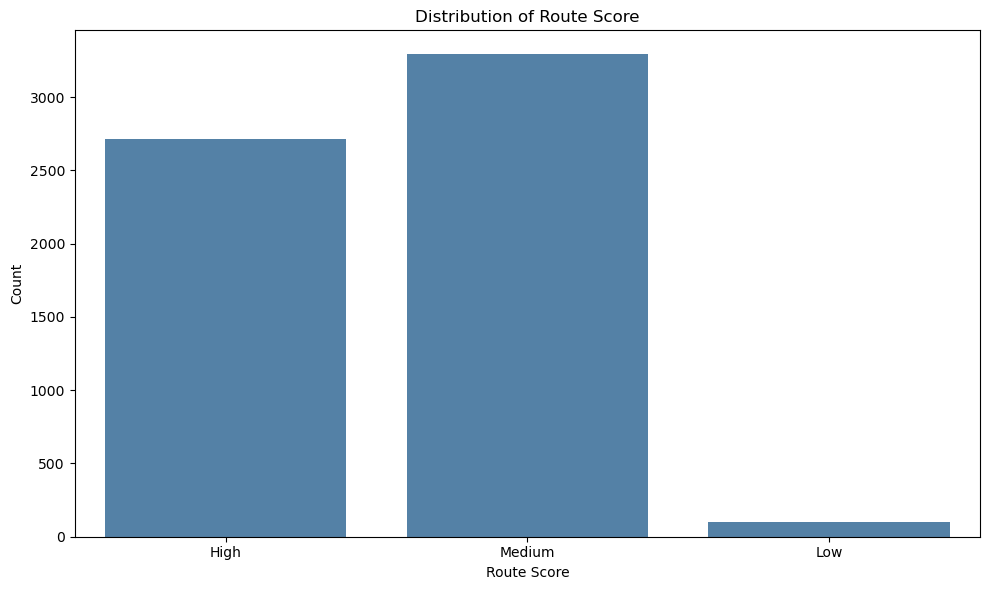

In [28]:
# Plot the distribution of the "route_score" column
plt.figure(figsize=(10, 6))
sns.countplot(x="route_score", data=route_data, color = "Steelblue")
plt.title("Distribution of Route Score")
plt.xlabel("Route Score")
plt.ylabel("Count")
plt.xticks()  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Station

In [29]:
# Unique values in column "station_code"
print(route_data['station_code'].unique())

['DLA3' 'DSE4' 'DSE5' 'DLA9' 'DLA7' 'DCH4' 'DBO2' 'DBO3' 'DLA8' 'DLA5'
 'DCH3' 'DCH1' 'DAU1' 'DCH2' 'DLA4' 'DSE2' 'DBO1']


In [30]:
# Extract unique station locations
station_locations = set(re.match(r'([A-Z]+)', i).group(1) for i in route_data['station_code'].unique())

print(station_locations)

# Extract number of stations for each broad station code
for location in station_locations:
    stations = []
    for station_code in route_data['station_code'].unique():
        if location in station_code:
            stations.append(location)
    print(f'station location: {location}, number of stations: {len(stations)}')

{'DBO', 'DLA', 'DSE', 'DCH', 'DAU'}
station location: DBO, number of stations: 3
station location: DLA, number of stations: 6
station location: DSE, number of stations: 3
station location: DCH, number of stations: 4
station location: DAU, number of stations: 1


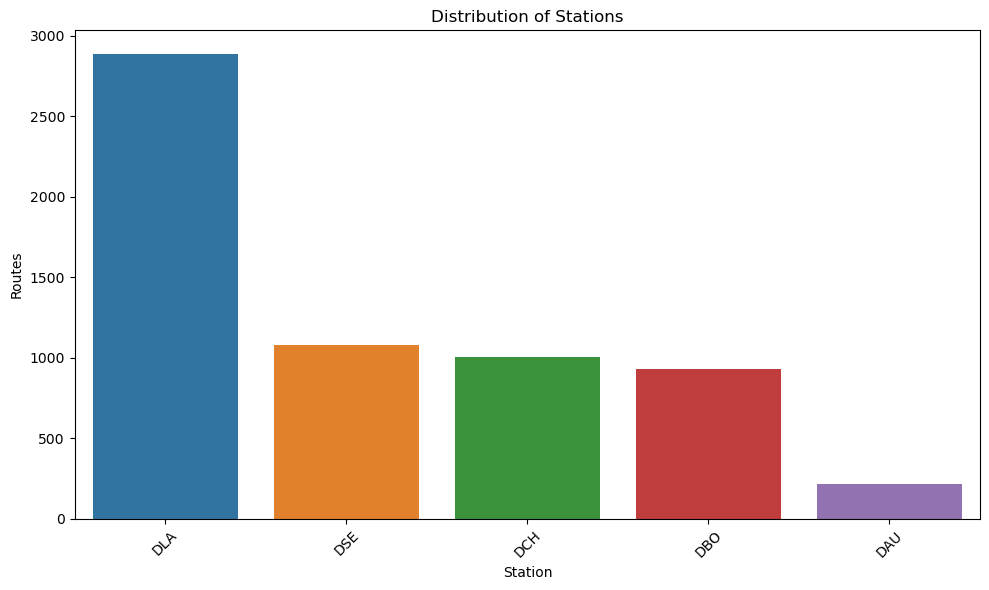

In [31]:
# Function to filter station codes based on umbrella stations
def filter_station(station_code):
    for station in station_locations:
        if station in station_code:
            return station

# group station_code
route_data['station_code_grouped'] = route_data['station_code'].apply(filter_station)

# Plot the distribution of the "station_code_grouped" column
plt.figure(figsize=(10, 6))
sns.countplot(x="station_code_grouped", data=route_data)
plt.title("Distribution of Stations")
plt.xlabel("Station")
plt.ylabel("Routes")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [32]:
# Number of unique routes in each city
route_data['station_code_grouped'].value_counts()

station_code_grouped
DLA    2888
DSE    1079
DCH    1002
DBO     929
DAU     214
Name: count, dtype: int64

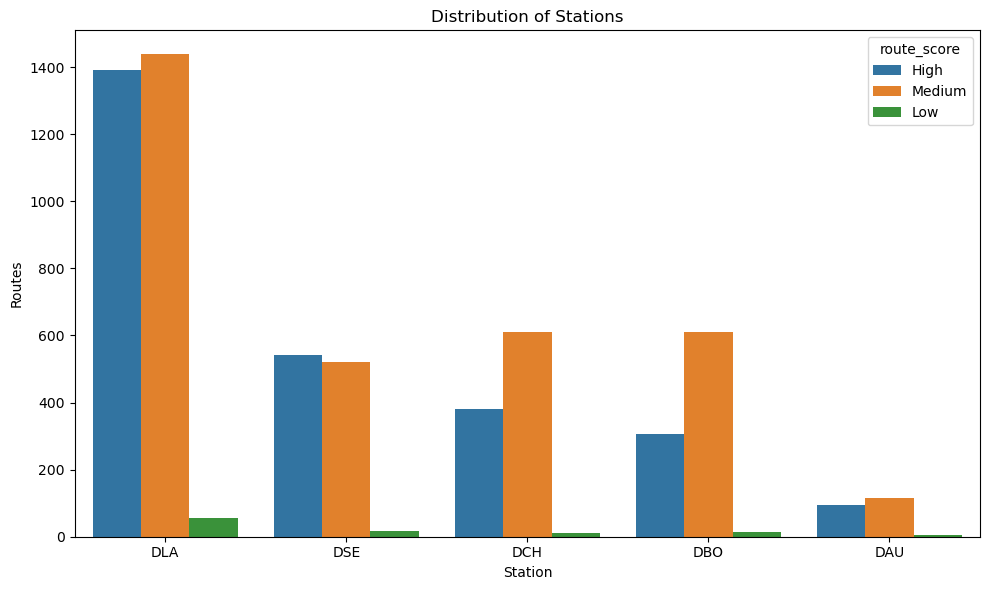

In [33]:
# Plot the distribution of the "station_code_grouped" column with respect to route_score
plt.figure(figsize=(10, 6))
sns.countplot(x="station_code_grouped", data=route_data, hue='route_score')
plt.title("Distribution of Stations")
plt.xlabel("Station")
plt.ylabel("Routes")
plt.xticks()
plt.tight_layout()
plt.show()

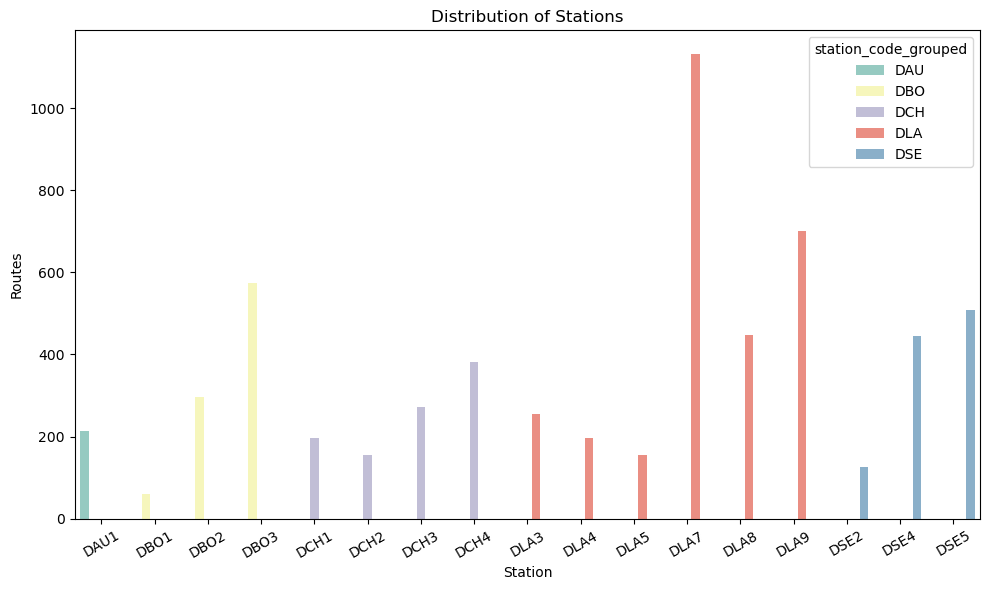

In [34]:
# Sort the DataFrame by "station_code_grouped" column
route_data_sorted = route_data.sort_values(by="station_code_grouped")

# Get the unique station codes and sort them
unique_station_codes = route_data_sorted["station_code"].unique()
unique_station_codes.sort()

# Plot the distribution of the "station_code" column colored by "station_code_grouped"
plt.figure(figsize=(10, 6))
sns.countplot(x="station_code", data=route_data_sorted, hue="station_code_grouped", palette="Set3", order=unique_station_codes)
plt.title("Distribution of Stations")
plt.xlabel("Station")
plt.ylabel("Routes")
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Date

In [35]:
# Convert the "date_YYYY_MM_DD" column to datetime
route_data['date_YYYY_MM_DD'] = pd.to_datetime(route_data['date_YYYY_MM_DD'])

In [36]:
# Basic stats of delivery date
route_data['date_YYYY_MM_DD'].describe()

count                             6112
mean     2018-08-05 13:13:58.743455488
min                2018-07-19 00:00:00
25%                2018-07-28 00:00:00
50%                2018-08-06 00:00:00
75%                2018-08-13 06:00:00
max                2018-08-26 00:00:00
Name: date_YYYY_MM_DD, dtype: object

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


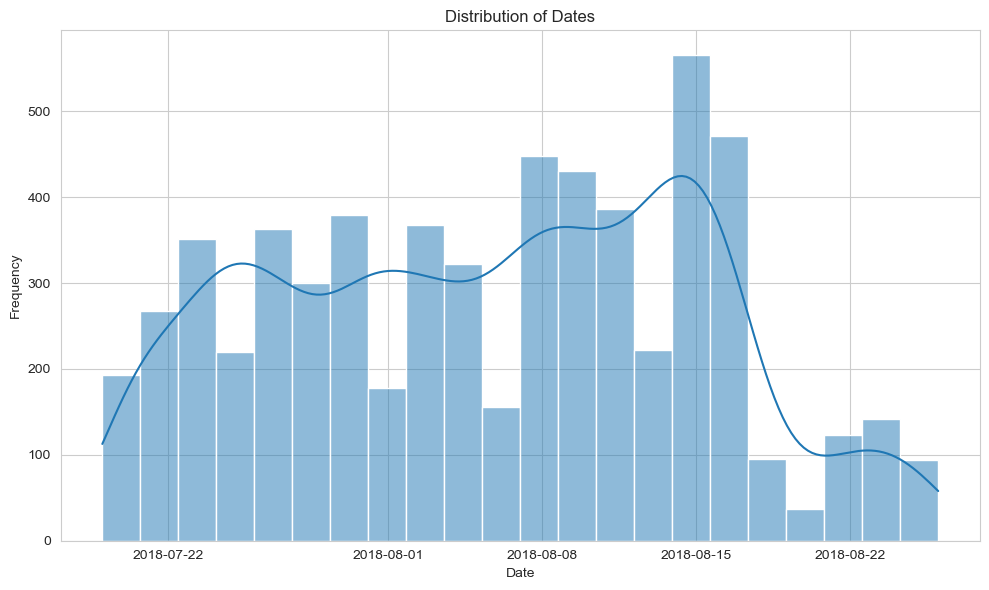

In [37]:
# Plot distribution of delivery dates
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data = route_data, x='date_YYYY_MM_DD',kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

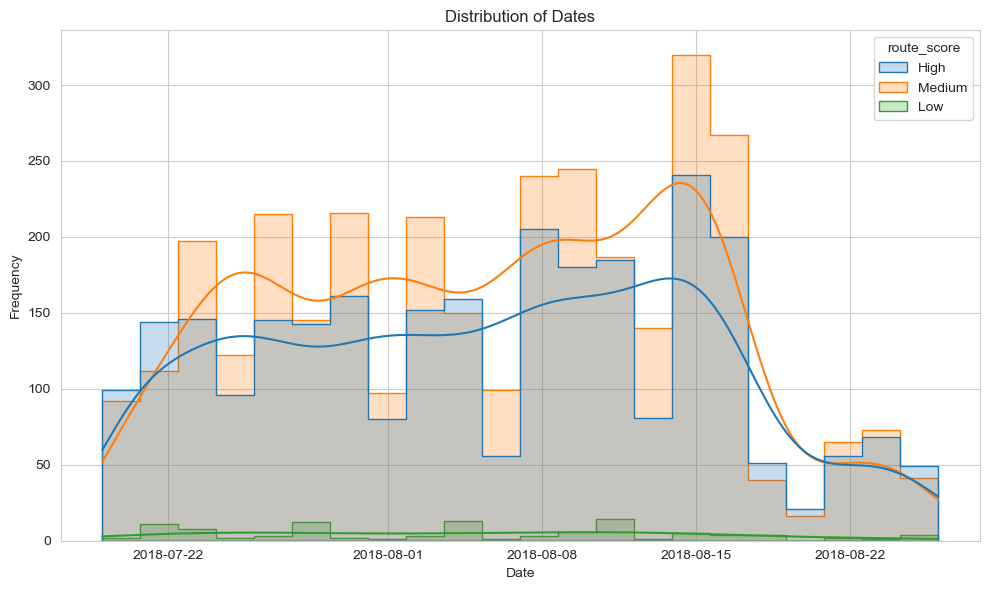

In [38]:
# Plot distribution of dates segmented by route scores
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data = route_data, x='date_YYYY_MM_DD', hue='route_score', element="step", kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### weekday

In [39]:
# Extract weekday from the datetime column
route_data['weekday'] = route_data['date_YYYY_MM_DD'].dt.weekday

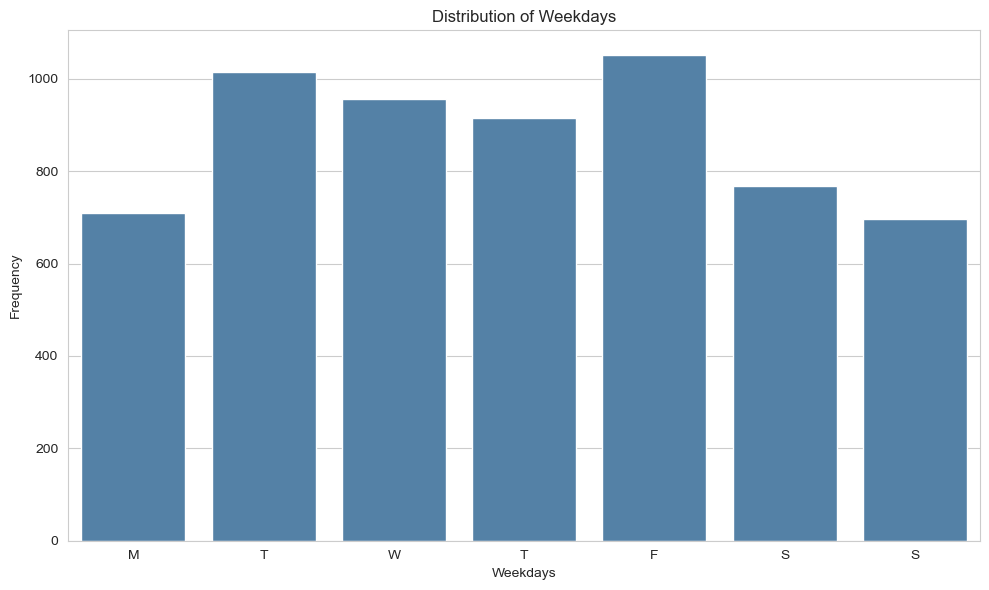

In [40]:
# Define abbreviated weekday names
weekday_names = ['M', 'T', 'W', 'T', 'F', 'S', 'S']

# Plot distribution of delivery days
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=route_data, x='weekday', color='steelblue')

# Set x-axis tick labels
plt.xticks(ticks=range(7), labels=weekday_names)

plt.title('Distribution of Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

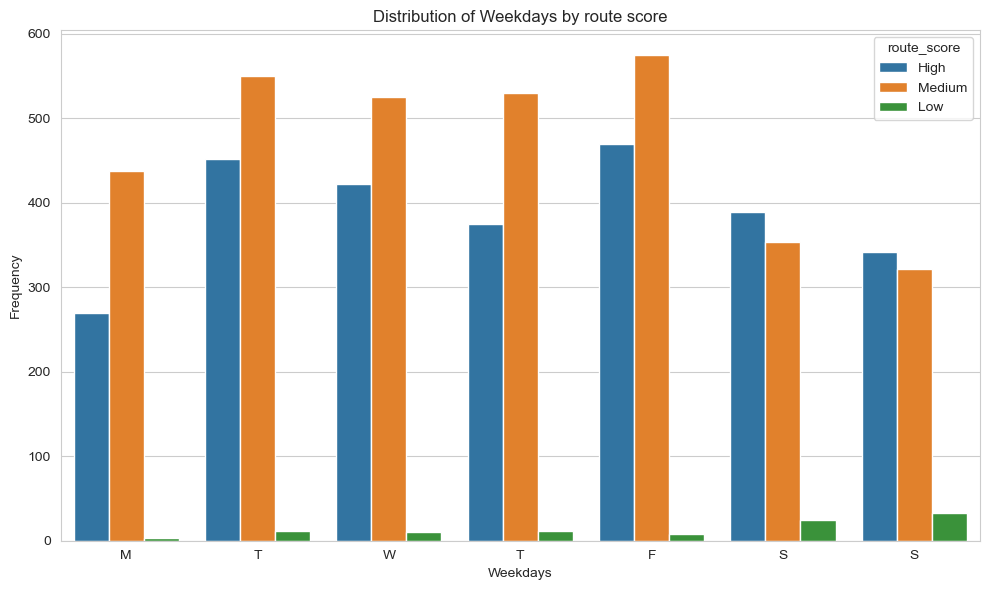

In [41]:
# Plot distribution of delivery days
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=route_data, x='weekday', hue='route_score')

# Set x-axis tick labels
plt.xticks(ticks=range(7), labels=weekday_names)

plt.title('Distribution of Weekdays by route score')
plt.xlabel('Weekdays')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### departure time (Hour)

In [42]:
# Convert the "departure_time_utc" column to datetime
route_data['departure_time_utc'] = pd.to_timedelta(route_data['departure_time_utc'])

# Extract hour from departure times
route_data['departure_hour'] = route_data['departure_time_utc'].dt.components['hours']

In [43]:
# Basic stats
route_data['departure_time_utc'].describe()

count                         6112
mean     0 days 14:43:57.366819371
std      0 days 01:17:48.960863337
min                0 days 10:48:03
25%                0 days 14:01:24
50%         0 days 14:58:23.500000
75%         0 days 15:37:41.250000
max                0 days 18:27:10
Name: departure_time_utc, dtype: object

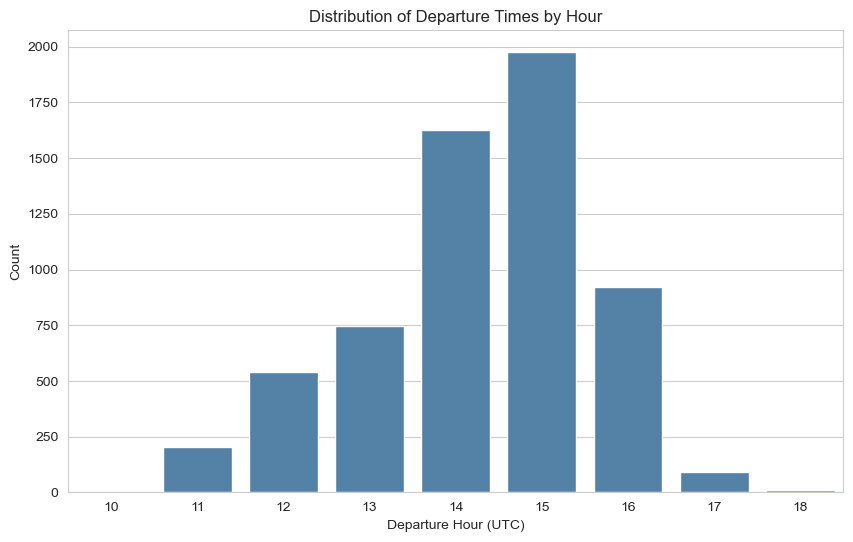

In [44]:
# Plot distribution of departure hour
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_hour', data=route_data, color="steelblue")
plt.title('Distribution of Departure Times by Hour')
plt.xlabel('Departure Hour (UTC)')
plt.ylabel('Count')
plt.show()

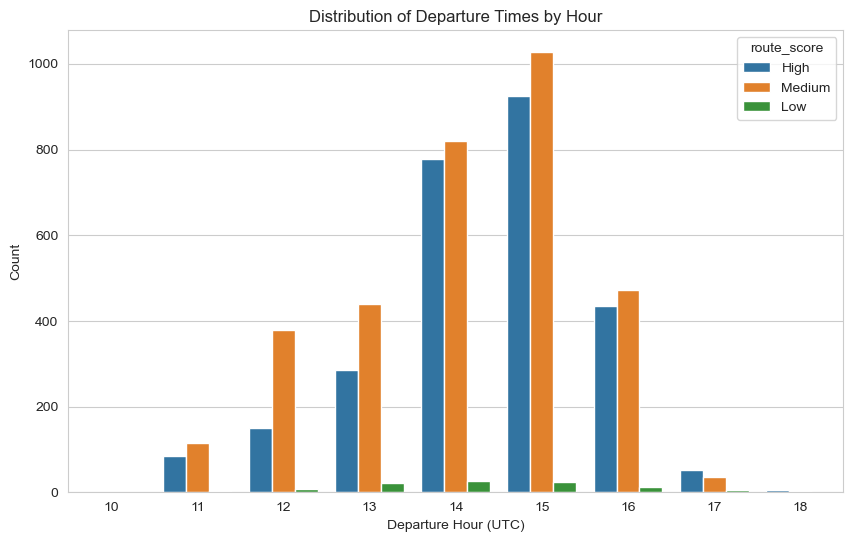

In [45]:
# Plot distribution of departure hour by route scores
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_hour', data=route_data, hue='route_score')
plt.title('Distribution of Departure Times by Hour')
plt.xlabel('Departure Hour (UTC)')
plt.ylabel('Count')
plt.show()

#### Vehicle capacity

In [46]:
#unique vehicle sizes
print(route_data['executor_capacity_cm3'].unique())

[3313071.0 4247527.0 3114853.25]


In [47]:
# Value counts for each size
route_data['executor_capacity_cm3'].value_counts()

executor_capacity_cm3
3313071.0     4175
4247527.0     1926
3114853.25      11
Name: count, dtype: int64

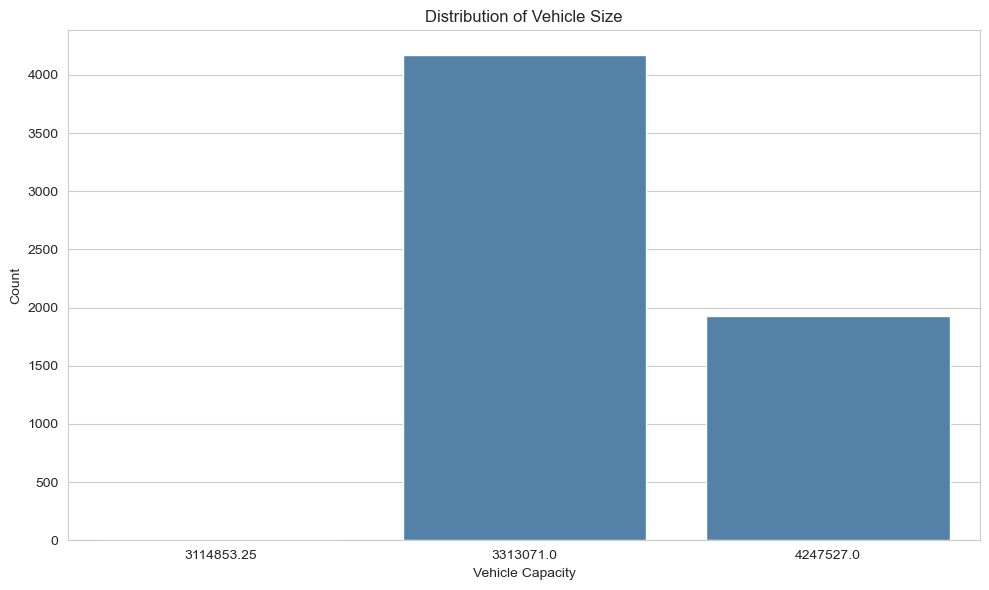

In [48]:
# Plot the distribution of the "executor_capacity_cm3" column
plt.figure(figsize=(10, 6))
sns.countplot(x="executor_capacity_cm3", data=route_data, color = "Steelblue")
plt.title("Distribution of Vehicle Size")
plt.xlabel("Vehicle Capacity")
plt.ylabel("Count")
plt.xticks()  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [49]:
# Counts of unique capacity volumes by route scores
route_data.groupby(['route_score','executor_capacity_cm3']).size()

route_score  executor_capacity_cm3
High         3114853.25                  7
             3313071.00               1873
             4247527.00                838
Low          3313071.00                 66
             4247527.00                 36
Medium       3114853.25                  4
             3313071.00               2236
             4247527.00               1052
dtype: int64

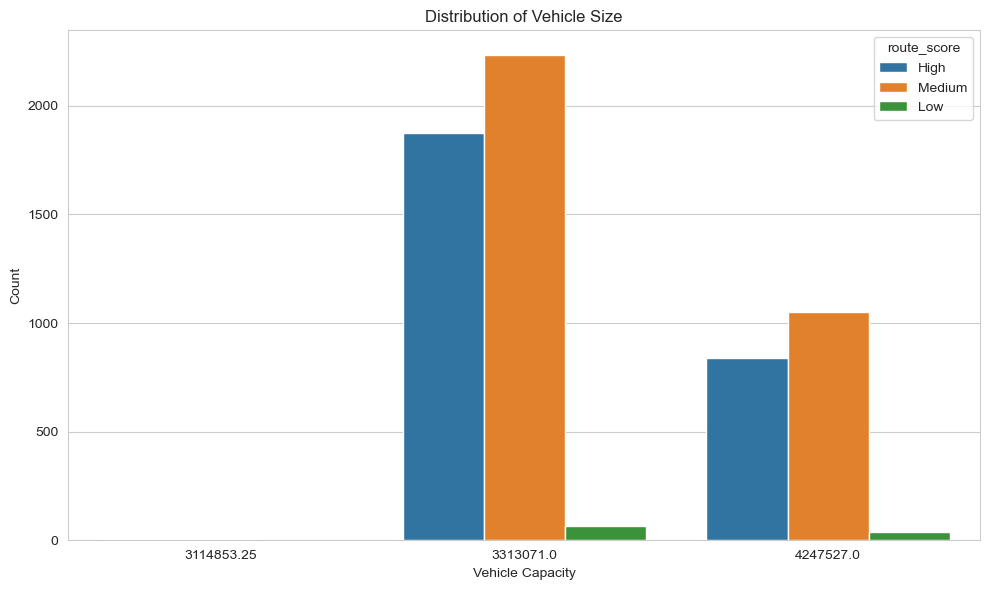

In [50]:
# Plot the distribution of the "executor_capacity_cm3" column with respect to route_score
plt.figure(figsize=(10, 6))
sns.countplot(x="executor_capacity_cm3", data=route_data, hue='route_score')
plt.title("Distribution of Vehicle Size")
plt.xlabel("Vehicle Capacity")
plt.ylabel("Count")
plt.xticks()
plt.tight_layout()
plt.show()

### Package Information

In [51]:
package_data.head()

AD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'PackageID_de2b05b8-2186-47b2-b0f1-640cd01b65...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             AF  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_15c6a204-ec5f-4ced-9c3d-472316cc77...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_ef2e9ad8-43a7-4043-9144-faf6730da3...   

                                                                                             AG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_3b28f781-242e-416e-9575-84c7188b82...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_62bd35ae-6fe9-40c0-8c58-0d1021a796...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'PackageID_1520728c-7a38-45a1-9e5d-123eb6d023...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_9f9e7677-9f0f-42c4-ac05-8015c1447d...   

                                                                                             BA  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_a18e36e0-6b5a-45b7-bf7a-7c3a15bd5a...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_80d944eb-442a-422f-9d40-3ad4bb73d7...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BE  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_22c8f630-8ab9-40d5-a36d-38ef01761b...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'PackageID_d3c08539-cea1-4079-a0a2-f064fc2083...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                                                NaN   

                                                                                             BG  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_0934f8ee-81f4-4084-b54f-5fe3e6c64b...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                                                NaN   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'PackageID_0168363a-f9ab-4795-bfda-787073937e...   

                                                                                             BP  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'PackageID_c734cbd5-768c-4c20-81df-f366c77627...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'PackageID_c5e97530-28a1-481f-83a5-4cdb0e4b53...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                                                NaN   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                                                NaN   
RouteID_0021a2aa-780f-460d-b

#### Package count per RouteID

In [52]:
# Iterate over the rows and count the number of parcels for each routeID
package_counts = {}
for index, row in package_data.iterrows():
    route_id = index
    package_dict = row.dropna()  # Drop NaN values
    count = 0
    for package_id, details in package_dict.items():
        for key, items in details.items():
            count+=1
    package_counts[route_id] = count    

# Convert the parcel counts dictionary to a DataFrame
package_counts_df = pd.DataFrame.from_dict(package_counts, orient='index', columns=['Package_Count'])

# Display the DataFrame with the parcel counts for each routeID
package_counts_df.head()

Package_Count
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77            276
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59            199
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f            212
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f            241
RouteID_0021a2aa-780f-460d-b09a-f301709e2523            219

In [53]:
# Display route id with top 10 number of packages
package_counts_df.sort_values(by='Package_Count', ascending=False).head(10)

Package_Count
RouteID_e1a4bf8a-a54b-41b4-bf38-266cc87a9990            304
RouteID_6db9f2fd-6d04-4c84-bfd5-10756d15b3ec            299
RouteID_fccc5eac-0af4-4a65-9764-42bf4f393a0f            299
RouteID_d0483a7f-5e6b-47b0-800f-81767378c34b            299
RouteID_6324649c-bc02-4259-8382-706b081fe71c            299
RouteID_acab120e-025e-4288-84a3-8dd9212c5bde            299
RouteID_77a7311c-7c9e-4290-be9b-f3137828b05d            299
RouteID_3896aca0-c730-4df5-ad1d-ca80bbd66fe3            299
RouteID_75006043-c8d8-4304-a43b-619b8f7bab73            299
RouteID_ff709338-da35-4864-ab32-6bcd8b75f953            299

In [54]:
# Create new dataframe to store new features
df = pd.merge(route_data, package_counts_df, left_index=True, right_index=True)
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219

In [55]:
# Basic statistics of package count
df['Package_Count'].describe()

count    6112.000000
mean      238.412140
std        30.979955
min       150.000000
25%       217.000000
50%       239.000000
75%       262.000000
max       304.000000
Name: Package_Count, dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


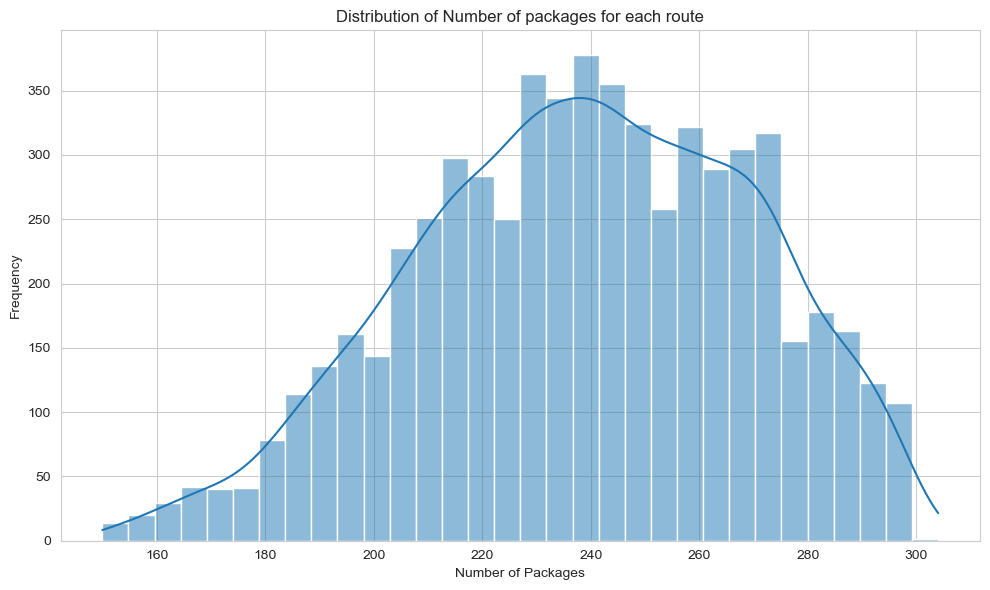

In [56]:
# Plot distribution of package count
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Package_Count', kde=True)
plt.title('Distribution of Number of packages for each route')
plt.xlabel('Number of Packages')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [57]:
# Statistics for number of packages by route score
df.groupby(['route_score'])['Package_Count'].describe().transpose()

route_score         High         Low       Medium
count        2718.000000  102.000000  3292.000000
mean          239.721118  242.696078   237.198663
std            31.763124   32.202266    30.231539
min           150.000000  150.000000   150.000000
25%           218.000000  216.250000   216.000000
50%           241.000000  249.000000   238.000000
75%           264.000000  268.750000   260.000000
max           304.000000  299.000000   299.000000

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

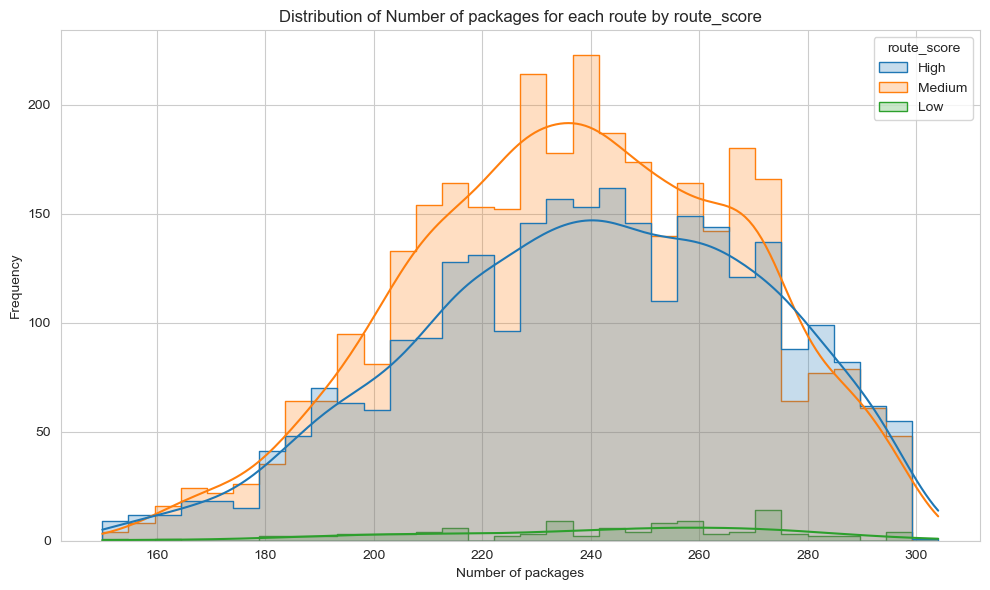

In [58]:
# Plot distribution of package count by route scores
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Package_Count', hue='route_score', element='step', kde=True)
plt.title('Distribution of Number of packages for each route by route_score')
plt.xlabel('Number of packages')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Time windows for delivery

In [59]:
# Calculate start and end time windows for each routeID
route_time_windows = {}
route_time_windows['time_window_start'] = []
route_time_windows['time_window_end'] = []

for route_id, row in package_data.iterrows():
    start_time = []
    end_time = []
    
    package_dict = row.dropna()
    for package_id, details in package_dict.items():
        for key, items in details.items():
            time_window = items['time_window']
            start_time_utc = time_window['start_time_utc']
            end_time_utc = time_window['end_time_utc']
            start_time.append(start_time_utc)
            end_time.append(end_time_utc)
    route_time_windows['time_window_start'].append(start_time)
    route_time_windows['time_window_end'].append(end_time)

In [60]:
time_windows_df = pd.DataFrame.from_dict(route_time_windows, orient='index').transpose()
time_windows_df.index = package_data.index

# Merge route_volumes_df with df
df = pd.merge(df, time_windows_df, left_index=True, right_index=True)

In [61]:
# Function to filter out None values and return None if list is empty
def filter_none(lst):
    filtered_list = [x for x in lst if x is not None]
    return filtered_list if filtered_list else None

# Apply the function to each row of the DataFrame
time_windows_df['time_window_start'] = time_windows_df['time_window_start'].apply(filter_none)
time_windows_df['time_window_end'] = time_windows_df['time_window_end'].apply(filter_none)

# Display time_windows_df
time_windows_df.head()

time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [2018-07-27 16:00:00, 2018-07-27 16:00:00, 201...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [2018-07-28 07:00:00, 2018-07-28 07:00:00, 201...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [2018-08-18 15:30:00, 2018-08-18 17:00:00, 201...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [2018-08-15 16:00:00, 2018-08-15 16:00:00, 201...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                              [2018-08-05 16:00:00]   

                                                                                time_window_end  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [2018-07-28 00:00:00, 2018-07-28 00:00:00, 201...  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [2018-07-29 06:59:00, 2018-07-29 06:59:00, 201...  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [2018-08-18 23:30:00, 2018-08-19 00:00:00, 201...  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [2018-08-15 20:00:00, 2018-08-15 20:00:00, 201...  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                              [2018-08-06 00:00:00]

In [62]:
# Total number of deliveries with specified time_windows
time_windows_df['num_specified_time_windows'] = time_windows_df['time_window_start'].apply(lambda x: len(x))
time_windows_df.head()

time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [2018-07-27 16:00:00, 2018-07-27 16:00:00, 201...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [2018-07-28 07:00:00, 2018-07-28 07:00:00, 201...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [2018-08-18 15:30:00, 2018-08-18 17:00:00, 201...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [2018-08-15 16:00:00, 2018-08-15 16:00:00, 201...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                              [2018-08-05 16:00:00]   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [2018-07-28 00:00:00, 2018-07-28 00:00:00, 201...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [2018-07-29 06:59:00, 2018-07-29 06:59:00, 201...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [2018-08-18 23:30:00, 2018-08-19 00:00:00, 201...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [2018-08-15 20:00:00, 2018-08-15 20:00:00, 201...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                              [2018-08-06 00:00:00]   

                                              num_specified_time_windows  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                          55  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                          17  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                          25  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                          21  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                           1

In [63]:
time_windows_df['num_specified_time_windows'].describe()

count    6112.000000
mean       18.650687
std        15.260114
min         1.000000
25%         7.000000
50%        15.000000
75%        27.000000
max       102.000000
Name: num_specified_time_windows, dtype: float64

In [64]:
# Merge route_volumes_df[['num_specified_time_windows']] with df
df = pd.merge(df, time_windows_df[['num_specified_time_windows']], left_index=True, right_index=True)
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                                                              time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-27 16:00:00, None, 2018-07-27 1...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 16:00:00, 2018-08-15 1...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, None, None, None, None, None, None, Non...   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-28 00:00:00, None, 2018-07-28 0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, 

In [65]:
# Basic statistics for 'num_specified_time_windows'
df['num_specified_time_windows'].describe()

count    6112.000000
mean       18.650687
std        15.260114
min         1.000000
25%         7.000000
50%        15.000000
75%        27.000000
max       102.000000
Name: num_specified_time_windows, dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


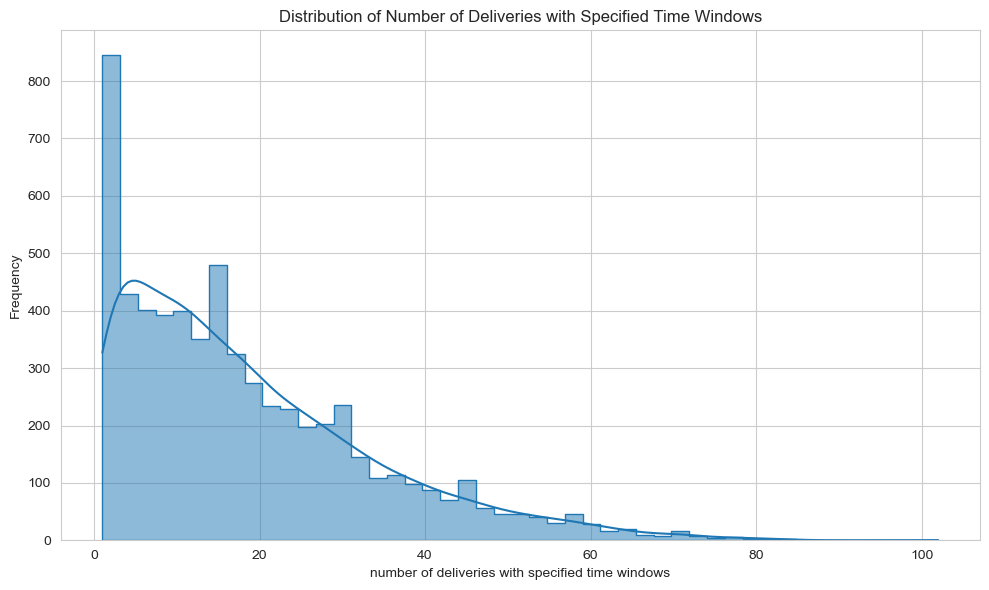

In [66]:
# Plot Distribution of Number of Deliveries with Specified Time Windows
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_specified_time_windows', element='step', kde=True)
plt.title('Distribution of Number of Deliveries with Specified Time Windows')
plt.xlabel('number of deliveries with specified time windows')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [67]:
# Basic statistics for 'num_specified_time_windows' by route scores
df.groupby(['route_score'])['num_specified_time_windows'].describe().transpose()

route_score         High         Low       Medium
count        2718.000000  102.000000  3292.000000
mean           19.153790    6.303922    18.617861
std            15.652343    9.069358    14.922806
min             1.000000    1.000000     1.000000
25%             7.000000    1.000000     7.000000
50%            15.000000    3.000000    15.000000
75%            27.000000    7.000000    27.000000
max            83.000000   58.000000   102.000000

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

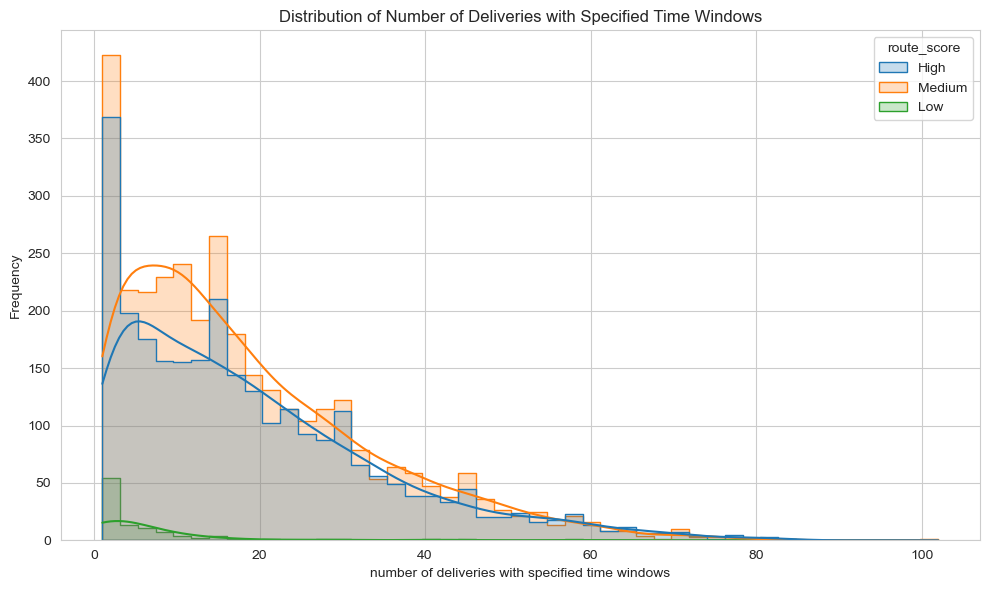

In [68]:
# Plot Distribution of Number of Deliveries with Specified Time Windows by route scores
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_specified_time_windows', hue='route_score', element='step', kde=True)
plt.title('Distribution of Number of Deliveries with Specified Time Windows')
plt.xlabel('number of deliveries with specified time windows')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [69]:
# Calculate ratio of deliveries with specified time windows/ total deliveries in each route
df['num_specified_time_windows(%)'] = df['num_specified_time_windows']/df['Package_Count']

In [70]:
# Basic statistics for 'num_specified_time_windows(%)' by route scores
df.groupby(['route_score'])['num_specified_time_windows(%)'].describe().transpose()

route_score         High         Low       Medium
count        2718.000000  102.000000  3292.000000
mean            0.081789    0.027273     0.079805
std             0.068935    0.042728     0.064947
min             0.003367    0.003344     0.003356
25%             0.028269    0.005071     0.030303
50%             0.065438    0.011814     0.063559
75%             0.114943    0.029803     0.112069
max             0.436170    0.269767     0.369792

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

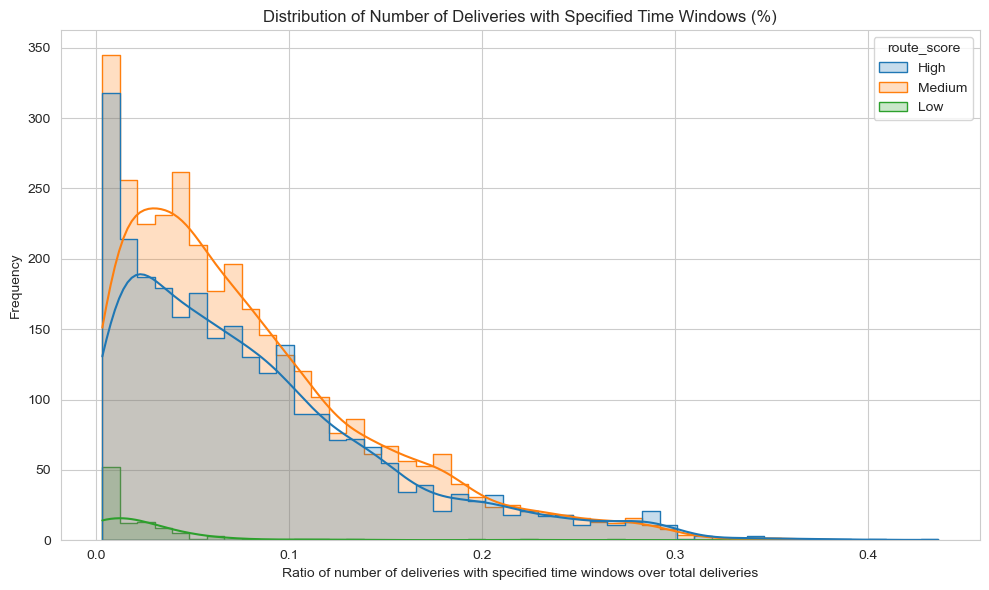

In [71]:
# Plot Distribution of Number of Deliveries with Specified Time Windows
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_specified_time_windows(%)', hue='route_score', element='step', kde=True)
plt.title('Distribution of Number of Deliveries with Specified Time Windows (%)')
plt.xlabel('Ratio of number of deliveries with specified time windows over total deliveries')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Package Volume and Vehicle Capacity

In [72]:
# Calculate total volume for each routeID
route_volumes = {}
for route_id, row in package_data.iterrows():
    total_volume = 0
    package_dict = row.dropna()
    for package_id, details in package_dict.items():
        for key, items in details.items():
            dimensions = items['dimensions']
            volume = dimensions['depth_cm'] * dimensions['height_cm'] * dimensions['width_cm']
            total_volume += volume
    route_volumes[route_id] = total_volume

# Convert the dictionary to a DataFrame
route_volumes_df = pd.DataFrame.from_dict(route_volumes, orient='index', columns=['Total Volume'])

# Display the DataFrame
route_volumes_df.head()

Total Volume
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77   3032336.707
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59   2116358.160
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f   2448962.139
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f   2198490.023
RouteID_0021a2aa-780f-460d-b09a-f301709e2523   2396939.531

In [73]:
# Basic stats of Total package volume
route_volumes_df['Total Volume'].describe()

count    6.112000e+03
mean     2.641163e+06
std      4.705873e+05
min      1.242909e+06
25%      2.297218e+06
50%      2.635624e+06
75%      2.990316e+06
max      4.427702e+06
Name: Total Volume, dtype: float64

In [74]:
# Merge route_volumes_df with route_data
df = pd.merge(df, route_volumes_df, left_index=True, right_index=True)
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                                                              time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-27 16:00:00, None, 2018-07-27 1...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 16:00:00, 2018-08-15 1...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, None, None, None, None, None, None, Non...   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-28 00:00:00, None, 2018-07-28 0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, 

In [75]:
# Calculate ratio of volume in the vehicle that is taken up by package space
df['Used Capacity'] = df['Total Volume']/df['executor_capacity_cm3']

In [76]:
# Basic statistics for used capacity
df[['Used Capacity']].agg(['count', 'nunique', 'min', 'max','mean'])

Used Capacity
count      6112.000000
nunique    6112.000000
min           0.334795
max           1.042419
mean          0.740361

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


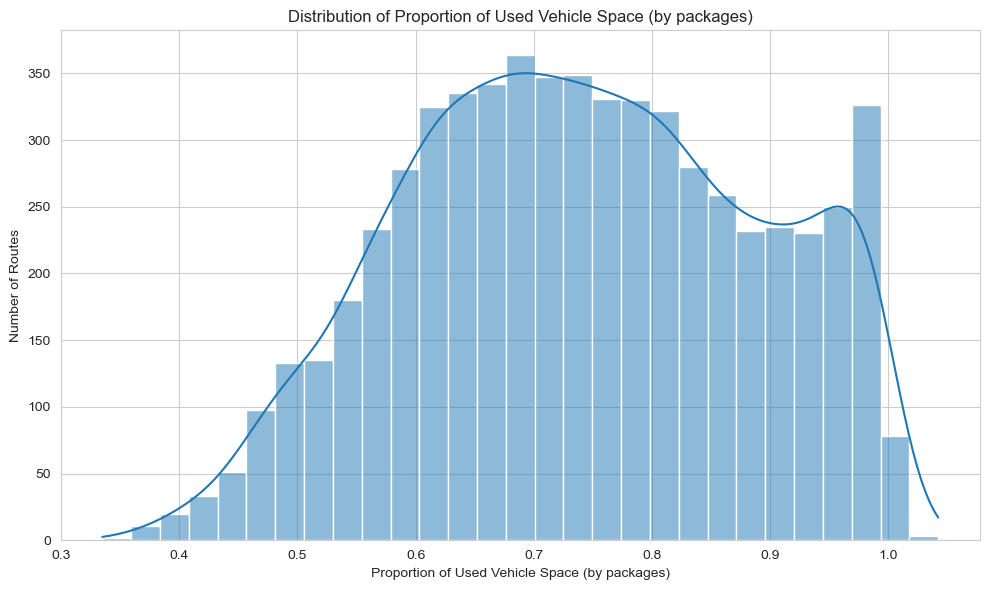

In [77]:
# Plot distribution of used capacity
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Used Capacity', kde=True)
plt.title('Distribution of Proportion of Used Vehicle Space (by packages)')
plt.xlabel('Proportion of Used Vehicle Space (by packages)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

In [78]:
# Basic statistics of used capacity by route scores
df.groupby(['route_score'])['Used Capacity'].agg(['count', 'nunique', 'min', 'max','mean']).transpose()

route_score      High       Low    Medium
count            2718       102      3292
nunique          2718       102      3292
min          0.334795  0.410843  0.354795
max          1.042419  0.986609  1.012909
mean         0.745622  0.732455  0.736262

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

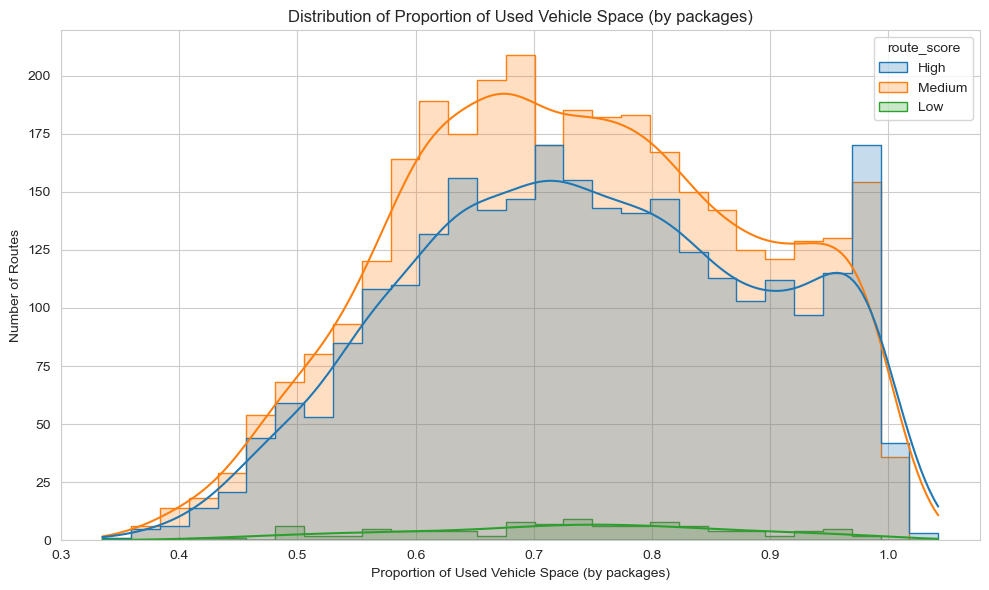

In [79]:
# Plot distribution of used capacity with respect to route_score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Used Capacity', hue='route_score', element='step', kde=True)
plt.title('Distribution of Proportion of Used Vehicle Space (by packages)')
plt.xlabel('Proportion of Used Vehicle Space (by packages)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

#### Planned service time

In [80]:
# Calculate total service time for each routeID
route_service_time = {}
for route_id, row in package_data.iterrows():
    total_service_time = 0
    package_dict = row.dropna()
    for package_id, details in package_dict.items():
        for key, items in details.items():
            service_time = items['planned_service_time_seconds']
            total_service_time += service_time
    route_service_time[route_id] = total_service_time

# Convert the dictionary to a DataFrame
route_service_time_df = pd.DataFrame.from_dict(route_service_time, orient='index', columns=['Total Service Time'])

# Display the DataFrame
route_service_time_df.head()

Total Service Time
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             12940.9
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             18623.8
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             18951.1
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             15476.3
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             14729.7

In [81]:
# Merge route_service_time_df with df
df = pd.merge(df, route_service_time_df, left_index=True, right_index=True)
df['Total Service Time(min)'] = df['Total Service Time']/60
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                                                              time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-27 16:00:00, None, 2018-07-27 1...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 16:00:00, 2018-08-15 1...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, None, None, None, None, None, None, Non...   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-28 00:00:00, None, 2018-07-28 0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, 

In [82]:
# Basic statistics for Total Service Time (minutes)
df['Total Service Time(min)'].describe()

count    6112.000000
mean      271.156381
std        52.233950
min       127.568333
25%       234.366667
50%       268.495000
75%       304.807083
max       503.116667
Name: Total Service Time(min), dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


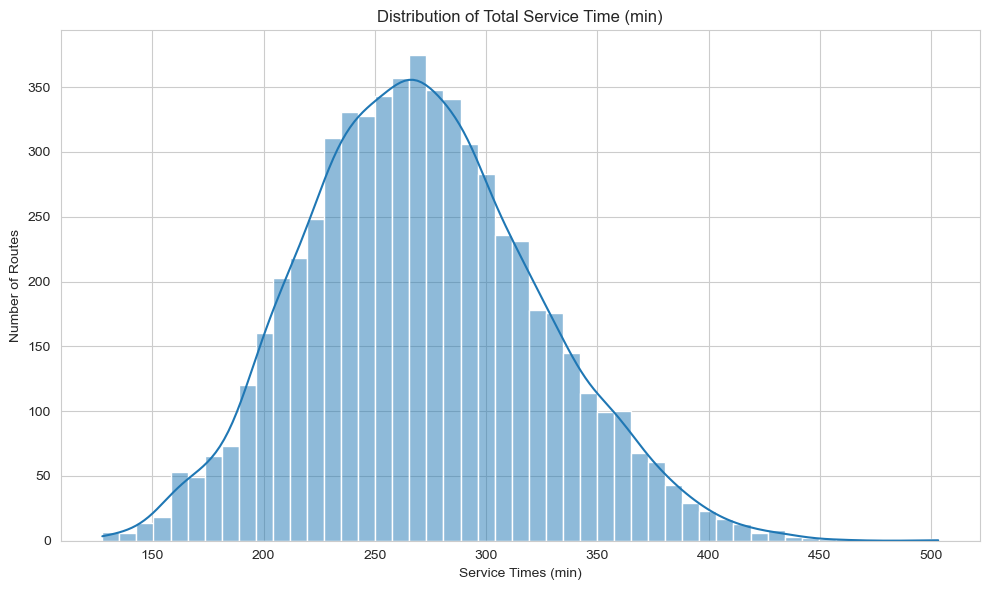

In [83]:
# Plot distribution of service time
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Service Time(min)', kde=True)
plt.title('Distribution of Total Service Time (min)')
plt.xlabel('Service Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

In [84]:
# Basic statistics for Total Service Time by route scores (minutes)
df.groupby(['route_score'])['Total Service Time(min)'].describe().transpose()

route_score         High         Low       Medium
count        2718.000000  102.000000  3292.000000
mean          280.624874  284.415114   262.928022
std            54.602165   58.117668    48.518219
min           127.568333  191.316667   129.570000
25%           242.142083  236.174167   229.359167
50%           278.862500  281.105000   261.054167
75%           317.902500  317.355417   293.519583
max           460.216667  503.116667   452.838333

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

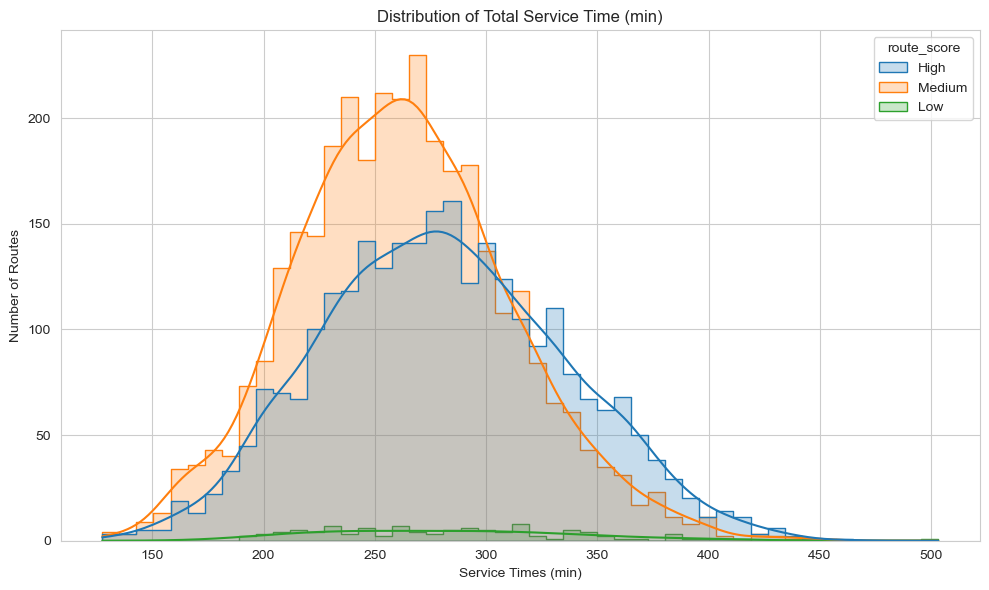

In [85]:
# Plot distribution of service time by route score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Service Time(min)', hue='route_score', element='step', kde=True)
plt.title('Distribution of Total Service Time (min)')
plt.xlabel('Service Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

#### scan_status

In [86]:
# Calculate total service time for each routeID
route_scan_status = {}
for route_id, row in package_data.iterrows():
    scan_statuses = []
    route_scan_status[route_id] = []
    package_dict = row.dropna()
    for package_id, details in package_dict.items():
        for key, items in details.items():
            scan_status = items['scan_status']
            scan_statuses.append(scan_status) 
    route_scan_status[route_id].append(scan_statuses)

# Convert the dictionary to a DataFrame
scan_status_df = pd.DataFrame.from_dict(route_scan_status, orient='index', columns=['all_scan_status'])

# Display the DataFrame
scan_status_df.head()

all_scan_status
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...

In [87]:
# Define function to count occurrences of each status
def count_status(status_list, status):
    return status_list.count(status)

# Apply function row-wise to create new columns
scan_status_df['num_rejected'] = scan_status_df['all_scan_status'].apply(lambda x: count_status(x, 'REJECTED'))
scan_status_df['num_delivered'] = scan_status_df['all_scan_status'].apply(lambda x: count_status(x, 'DELIVERED'))
scan_status_df['num_delivery_attempted'] = scan_status_df['all_scan_status'].apply(lambda x: count_status(x, 'DELIVERY_ATTEMPTED'))

scan_status_df.head()

all_scan_status  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [DELIVERED, DELIVERED, DELIVERED, DELIVERED, D...   

                                              num_rejected  num_delivered  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             0            274   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             0            196   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             0            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             0            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             0            218   

                                              num_delivery_attempted  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                       2  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                       3  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                       0  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                       0  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                       1

In [88]:
# Merge scan_status_df with df
df = pd.merge(df, scan_status_df[['num_rejected','num_delivered','num_delivery_attempted']], left_index=True, right_index=True)
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                              ...  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  ...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  ...   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-28 00:00:00, None, 2018-07-28 0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 20:00:00, 2018-08-15 2...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523

In [89]:
# Basic statistics of different scan statuses
df[['num_rejected','num_delivered','num_delivery_attempted']].describe()

num_rejected  num_delivered  num_delivery_attempted
count   6112.000000    6112.000000             6112.000000
mean       0.005236     236.604876                1.802029
std        0.078682      31.381523                2.960451
min        0.000000     128.000000                0.000000
25%        0.000000     215.000000                0.000000
50%        0.000000     238.000000                1.000000
75%        0.000000     261.000000                2.000000
max        2.000000     299.000000               45.000000

In [90]:
# Sum by different scan statuses by route scores
df.groupby(['route_score'])[['num_rejected','num_delivered','num_delivery_attempted']].describe().transpose()

route_score                          High         Low       Medium
num_rejected           count  2718.000000  102.000000  3292.000000
                       mean      0.006255    0.009804     0.004253
                       std       0.083390    0.099015     0.073833
                       min       0.000000    0.000000     0.000000
                       25%       0.000000    0.000000     0.000000
                       50%       0.000000    0.000000     0.000000
                       75%       0.000000    0.000000     0.000000
                       max       2.000000    1.000000     2.000000
num_delivered          count  2718.000000  102.000000  3292.000000
                       mean    237.655629  240.990196   235.601458
                       std      32.205734   32.639190    30.612809
                       min     138.000000  149.000000   128.000000
                       25%     215.000000  215.250000   214.000000
                       50%     239.500000  247.000000   236.000000
                       75%     263.000000  268.000000   259.000000
                       max     299.000000  298.000000   298.000000
num_delivery_attempted count  2718.000000  102.000000  3292.000000
                       mean      2.059235    1.696078     1.592953
                       std       3.213623    2.810127     2.721587
                       min       0.000000    0.000000     0.000000
                       25%       0.000000    0.000000     0.000000
                       50%       1.000000    0.000000     1.000000
                       75%       3.000000    2.000000     2.000000
                       max      31.000000   15.000000    45.000000

In [91]:
# Sum by different scan statuses
df[['num_rejected','num_delivered','num_delivery_attempted']].sum()

num_rejected                   32
num_delivered             1446129
num_delivery_attempted      11014
dtype: int64

In [92]:
# Sum by scan statuses and route scores
grouped_data = df.groupby(['route_score'])[['num_rejected','num_delivered','num_delivery_attempted']].sum()
grouped_data

num_rejected  num_delivered  num_delivery_attempted
route_score                                                     
High                   17         645948                    5597
Low                     1          24581                     173
Medium                 14         775600                    5244

#### Correlation between time window & package volume, planned service time

In [93]:
# Calculate start and end time windows for each routeID
corr_dict = {}
corr_dict['time_window_start'] = []
corr_dict['time_window_end'] = []
corr_dict['service_times'] = []
corr_dict['volumes'] = []

for route_id, row in package_data.iterrows():
    start_time = []
    end_time = []
    service_time = []
    volumes = []
    package_dict = row.dropna()
    for package_id, details in package_dict.items():
        for key, items in details.items():
            time_window = items['time_window']
            start_time_utc = time_window['start_time_utc']
            end_time_utc = time_window['end_time_utc']
            dimensions = items['dimensions']
            volume = dimensions['depth_cm'] * dimensions['height_cm'] * dimensions['width_cm']
            
            volumes.append(volume)
            service_time.append(items['planned_service_time_seconds'])
            start_time.append(start_time_utc)
            end_time.append(end_time_utc)
    corr_dict['time_window_start'].append(start_time)
    corr_dict['time_window_end'].append(end_time)
    corr_dict['service_times'].append(service_time)
    corr_dict['volumes'].append(volumes)

corr_df = pd.DataFrame(corr_dict)
corr_df.index = route_data.index
corr_df = pd.merge(corr_df,route_data,left_index=True,right_index=True)
corr_df.head()

time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-27 16:00:00, None, 2018-07-27 1...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 16:00:00, 2018-08-15 1...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, None, None, None, None, None, None, Non...   

                                                                                time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, 2018-07-28 00:00:00, None, 2018-07-28 0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, None, None, None, None, None, None, Non...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, None, None, None, None, None, None, Non...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, None, 2018-08-15 20:00:00, 2018-08-15 2...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, None, None, None, None, None, None, Non...   

                                                                                  service_times  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [59.3, 59.3, 59.3, 27.0, 45.0, 45.0, 38.0, 41....   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [95.2, 95.2, 95.2, 95.2, 95.2, 36.3, 36.3, 36....   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [58.3, 58.3, 58.3, 70.0, 45.0, 45.0, 320.0, 13...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [55.0, 40.0, 38.7, 38.7, 38.7, 38.7, 38.7, 38....   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [114.0, 106.0, 106.0, 104.0, 65.7, 65.7, 65.7,...   

                                                                                        volumes  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [3436.112, 5741.924, 9522.192000000001, 2466.0...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [16738.848, 15726.41, 10178.909999999998, 1118...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [1207.1280000000002, 2466.0, 5983.632000000000...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [7413.536000000001, 13392.72, 551.039999999999...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [15196.579999999998, 679.6800000000001, 10440....   

                                             station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77             3313071.0   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59             4247527.0   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f             4247527.0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f             3313071.0   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523             3313071.0   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                  

In [94]:
# Create a new DataFrame to store the exploded data
corr_df_explode = pd.DataFrame()

# Explode the 'time_window_start' column
corr_df_explode['time_window_start'] = corr_df['time_window_start'].explode()

# Explode the 'time_window_end' column
corr_df_explode['time_window_end'] = corr_df['time_window_end'].explode()

# Explode the 'service_times' column
corr_df_explode['service_times'] = corr_df['service_times'].explode()

# Explode the 'volumes' column
corr_df_explode['volumes'] = corr_df['volumes'].explode()

corr_df_explode = pd.merge(corr_df_explode, route_data[['route_score']], left_index=True, right_index=True)
corr_df_explode.head()

time_window_start  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  2018-07-27 16:00:00   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  2018-07-27 16:00:00   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   

                                                  time_window_end  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  2018-07-28 00:00:00   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  2018-07-28 00:00:00   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                 None   

                                             service_times   volumes  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77          59.3  3436.112   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77          59.3  5741.924   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77          59.3  9522.192   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77          27.0    2466.0   
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77          45.0  5741.924   

                                             route_score  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High

In [95]:
# Filter df with and without specified time windows
corr_df_timewindow = corr_df_explode.loc[corr_df_explode['time_window_start'].notna()]
corr_df_no_timewindow = corr_df_explode.loc[corr_df_explode['time_window_start'].isna()]

In [96]:
# Basic statistics for service times and volumes of deliveries with and without time windows
pd.options.display.float_format = '{:.2f}'.format

print('with time windows specified:')
display(corr_df_timewindow[['service_times','volumes']].agg(['count','nunique','min','max','mean']))
print('\nwithout time windows specified:')
display(corr_df_no_timewindow[['service_times','volumes']].agg(['count','nunique','min','max','mean']))

with time windows specified:


service_times   volumes
count        113993.00 113993.00
nunique        2569.00   7882.00
min               0.70      0.00
max            8007.00 300522.60
mean             82.62  12660.23


without time windows specified:


service_times    volumes
count       1343182.00 1343182.00
nunique        3755.00   58630.00
min               0.80       0.00
max            7514.00  295160.70
mean             67.02   10943.87

In [97]:
# Basic statistics for service times and volumes of deliveries with and without time windows
print('with time windows specified:')
display(corr_df_timewindow.groupby(['route_score'])[['service_times','volumes']].agg(['count','nunique','min','max','mean']))
print('\nwithout time windows specified:')
display(corr_df_no_timewindow.groupby(['route_score'])[['service_times','volumes']].agg(['count','nunique','min','max','mean']))

with time windows specified:


service_times                            volumes                \
                    count nunique  min     max  mean   count nunique   min   
route_score                                                                  
High                52060    2121 0.80 3221.00 82.90   52060    4188 15.62   
Low                   643     212 6.20 8007.00 94.71     643     228 79.53   
Medium              61290    2110 0.70 4717.00 82.25   61290    4757  0.00   

                                
                  max     mean  
route_score                     
High        300522.60 12323.91  
Low         168605.58 14539.67  
Medium      256892.35 12926.18


without time windows specified:


service_times                            volumes               \
                    count nunique  min     max  mean   count nunique  min   
route_score                                                                 
High               599502    3201 0.80 4440.00 69.14  599502   32108 0.00   
Low                 24112    1156 2.50 4083.00 69.66   24112    2333 0.00   
Medium             719568    2979 1.00 7514.00 65.17  719568   37524 0.00   

                                
                  max     mean  
route_score                     
High        245671.34 10957.65  
Low         211167.00 10772.22  
Medium      295160.70 10938.14

### Stop level

#### Latitude, Longitude, Type, Zone IDs

In [98]:
# store lists of latitudes, longitudes, types, and zone_ids for each stop in actual sequence order for each unique route_id

stop_data_dict = {}
stop_data_dict['latitude'] = []
stop_data_dict['longitude'] = []
stop_data_dict['type'] = []
stop_data_dict['zone_id'] = []

for i in range(len(actual_sequences)):
    sorted_sequences = sorted(actual_sequences.iloc[i,0].items(), key=lambda x: x[1])
    stops_info = route_data.iloc[i,5]
    
    lats = []
    longs = []
    types = []
    zone_ids = []
    
    for j in range(len(sorted_sequences)):
        lats.append(stops_info[sorted_sequences[j][0]]['lat'])
        longs.append(stops_info[sorted_sequences[j][0]]['lng'])
        types.append(stops_info[sorted_sequences[j][0]]['type'])
        zone_ids.append(stops_info[sorted_sequences[j][0]]['zone_id'])
        
    stop_data_dict['latitude'].append(lats)
    stop_data_dict['longitude'].append(longs)
    stop_data_dict['type'].append(types)
    stop_data_dict['zone_id'].append(zone_ids)

stop_features = pd.DataFrame(stop_data_dict)
stop_features.index = df.index
stop_features.head()

latitude  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [34.007369, 34.088467, 34.088709, 34.088717, 3...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [47.937344, 47.683784, 47.6858, 47.685103, 47....   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [47.464945, 47.267736, 47.26975, 47.269802, 47...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [33.688122, 33.817119, 33.816883, 33.8156, 33....   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [33.965477, 33.849607, 33.849557, 33.850399, 3...   

                                                                                      longitude  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [-118.143927, -118.284521, -118.284839, -118.2...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [-122.244952, -122.290503, -122.290577, -122.2...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [-122.231073, -122.525123, -122.526871, -122.5...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [-117.847178, -118.066725, -118.067948, -118.0...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [-117.653303, -117.798556, -117.79572, -117.79...   

                                                                                           type  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [Station, Dropoff, Dropoff, Dropoff, Dropoff, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [Station, Dropoff, Dropoff, Dropoff, Dropoff, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [Station, Dropoff, Dropoff, Dropoff, Dropoff, ...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [Station, Dropoff, Dropoff, Dropoff, Dropoff, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [Station, Dropoff, Dropoff, Dropoff, Dropoff, ...   

                                                                                        zone_id  
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  [None, A-2.2A, A-2.2A, A-2.2A, A-2.1A, A-2.1A,...  
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  [None, D-3.2A, D-3.2A, D-3.2A, D-3.2A, D-3.2A,...  
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  [None, A-2.2E, A-2.2E, A-2.2E, A-2.2E, A-2.2E,...  
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  [None, B-11.1G, B-11.1G, B-11.1G, B-11.1G, B-1...  
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  [None, C-17.3D, C-17.3D, C-17.3D, C-17.3D, C-1...

In [99]:
# Merge stop_features back into df
df = pd.merge(df, stop_features, left_index=True, right_index=True)
df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77            3313071.00   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59            4247527.00   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f            4247527.00   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f            3313071.00   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523            3313071.00   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                              ... Used Capacity  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  ...          0.92   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  ...          0.50   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  ...          0.58   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  ...          0.66   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  ...          0.72   

                                             Total Service Time  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77           12940.90   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59           18623.80   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f           18951.10   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f           15476.30   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523           14729.70   

                                              Total 

#### Number of stops

In [100]:
# Number of stops
df['num_stops'] = df['latitude'].apply(lambda x: len(x))

In [101]:
# Basic statistics of number of stops
df['num_stops'].describe()

count   6112.00
mean     147.99
std       31.03
min       33.00
25%      129.00
50%      151.00
75%      170.00
max      238.00
Name: num_stops, dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


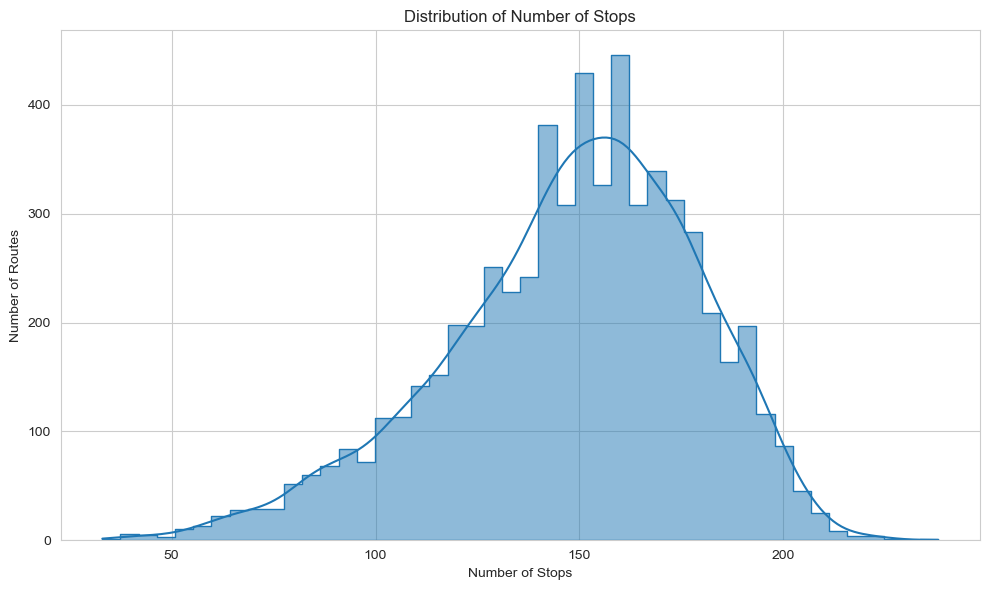

In [102]:
# Plot distribution of number of stops
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_stops', element='step', kde=True)
plt.title('Distribution of Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

In [103]:
# Basic statistics of number of stops by route score
df.groupby(['route_score'])['num_stops'].describe().transpose()

route_score    High    Low  Medium
count       2718.00 102.00 3292.00
mean         140.60 151.25  153.99
std           33.31  31.65   27.57
min           38.00  57.00   33.00
25%          118.00 132.00  138.00
50%          144.00 154.00  156.00
75%          165.00 174.00  173.00
max          222.00 209.00  238.00

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

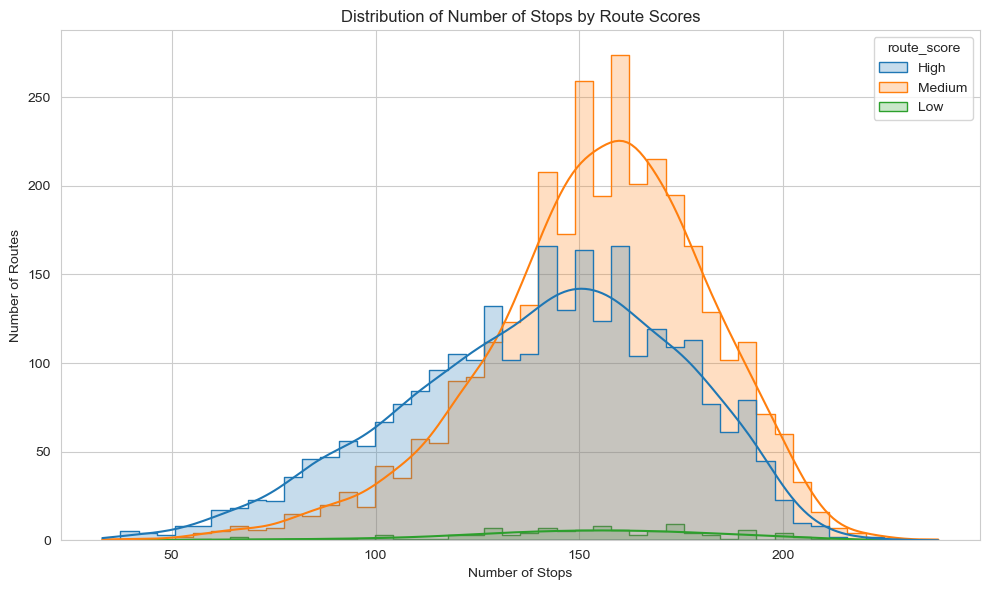

In [104]:
# Plot distribution of number of stops by route score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_stops', hue='route_score', element='step', kde=True)
plt.title('Distribution of Number of Stops by Route Scores')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

#### Travel times

In [105]:
# store lists of latitudes, longitudes, types, and zone_ids for each stop in actual sequence order for each unique route_id
travel_times_dict = {}
travel_times_dict['travel_times'] = []

for i in range(len(actual_sequences)):
    sorted_sequences = sorted(actual_sequences.iloc[i,0].items(), key=lambda x: x[1])
    travel_times_data = travel_times.iloc[i,:]
    
    stop_travel_times = 0
    start_idx = 0
    for j in sorted_sequences:
        if start_idx == 0:
            start_idx+=1
            stop_1 = j[0]
        else:
            stop_2 = j[0]
            stop_travel_times += travel_times_data[stop_1][stop_2]
            stop_1 = j[0]       
        
    travel_times_dict['travel_times'].append(stop_travel_times)

In [106]:
travel_times_features = pd.DataFrame(travel_times_dict)
travel_times_features.index = df.index
travel_times_features.head()

travel_times
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77       7754.10
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59       6647.80
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f       9897.40
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f       9491.50
RouteID_0021a2aa-780f-460d-b09a-f301709e2523      13523.70

In [107]:
# Merge stop_features back into df
df = pd.merge(df, travel_times_features, left_index=True, right_index=True)
df = df.rename(columns={'travel_times':'Total Travel Time'})
df['Total Travel Time(min)'] = df['Total Travel Time']/60

df.head()

station_code date_YYYY_MM_DD  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77         DLA3      2018-07-27   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59         DSE4      2018-07-28   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f         DSE5      2018-08-18   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f         DLA9      2018-08-15   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523         DLA7      2018-08-05   

                                             departure_time_utc  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77    0 days 16:02:10   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59    0 days 15:44:41   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f    0 days 15:32:04   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f    0 days 15:09:38   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523    0 days 14:23:26   

                                             executor_capacity_cm3  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77            3313071.00   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59            4247527.00   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f            4247527.00   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f            3313071.00   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523            3313071.00   

                                             route_score  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77        High   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59        High   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f        High   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f        High   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523        High   

                                                                                          stops  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  {'AD': {'lat': 34.099611, 'lng': -118.283062, ...   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  {'AC': {'lat': 47.689446, 'lng': -122.296071, ...   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  {'AA': {'lat': 47.268001, 'lng': -122.5079, 't...   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  {'AB': {'lat': 33.823076, 'lng': -118.058727, ...   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  {'AA': {'lat': 33.84364, 'lng': -117.773651, '...   

                                             station_code_grouped  weekday  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                  DLA        4   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                  DSE        5   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                  DSE        5   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                  DLA        2   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523                  DLA        6   

                                              departure_hour  Package_Count  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77              16            276   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59              15            199   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f              15            212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f              15            241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523              14            219   

                                              ... num_rejected num_delivered  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77  ...            0           274   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59  ...            0           196   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f  ...            0           212   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f  ...            0           241   
RouteID_0021a2aa-780f-460d-b09a-f301709e2523  ...            0           218   

                                              num_delivery_attempted  \
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77                       2   
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59                       3   
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f                       0   
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f                       0   
RouteID_0021a2aa-

In [108]:
# Basic Statistics of total travel time
df['Total Travel Time(min)'].describe()

count   6112.00
mean     179.74
std       44.19
min       44.18
25%      152.31
50%      183.80
75%      210.39
max      335.20
Name: Total Travel Time(min), dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


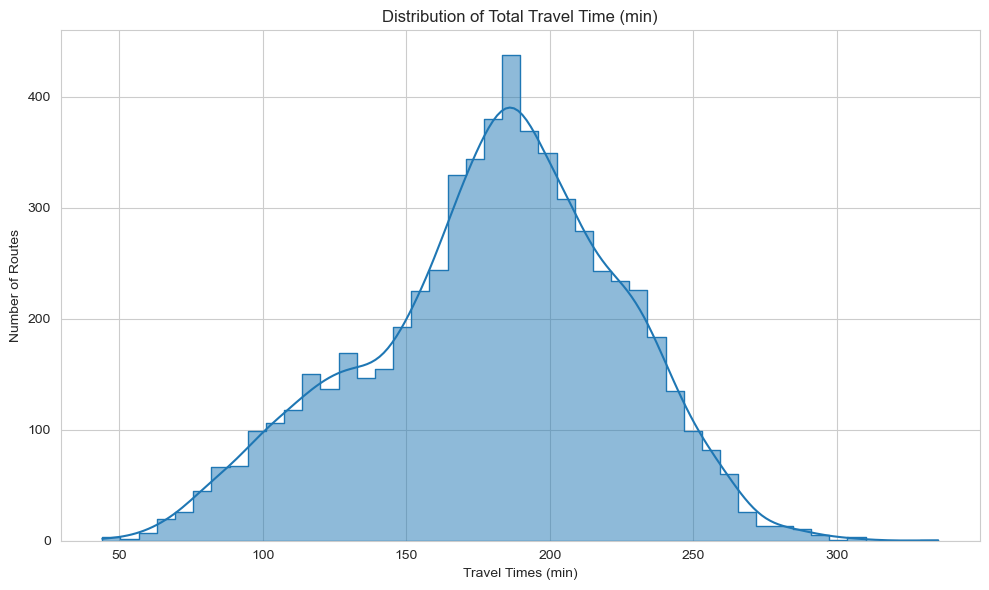

In [109]:
# Plot distribution of travel time
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Travel Time(min)', element='step', kde=True)
plt.title('Distribution of Total Travel Time (min)')
plt.xlabel('Travel Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

In [110]:
# Basic Statistics of total travel time by route scores
df.groupby(['route_score'])['Total Travel Time(min)'].describe().transpose()

route_score    High    Low  Medium
count       2718.00 102.00 3292.00
mean         163.73 183.94  192.83
std           45.51  46.22   38.31
min           44.18  76.32   60.52
25%          128.02 161.99  169.62
50%          168.19 184.62  194.08
75%          194.24 220.93  219.35
max          308.72 280.39  335.20

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

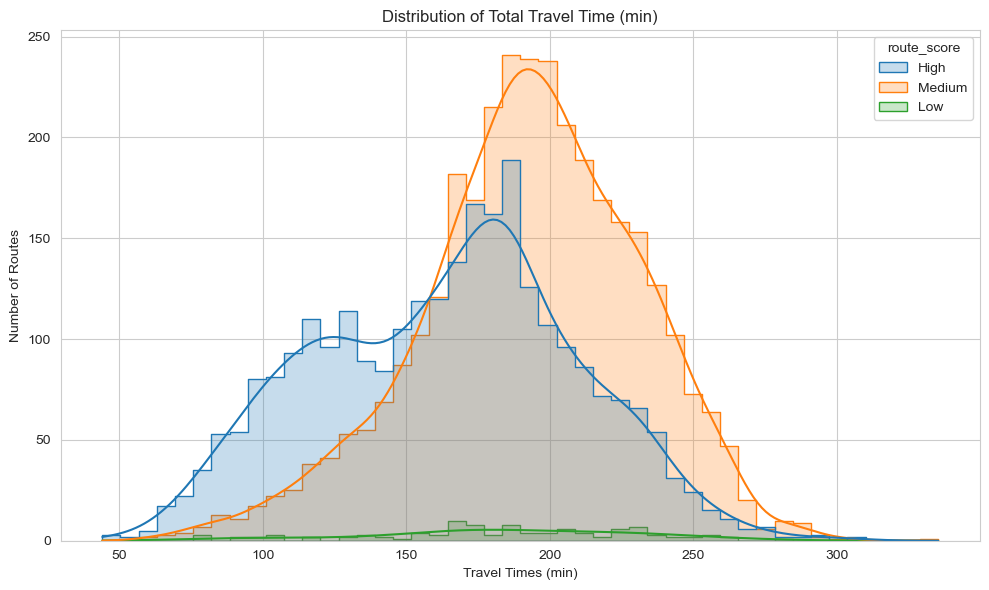

In [111]:
# Plot distribution of travel time by route score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Travel Time(min)', hue='route_score', element='step', kde=True)
plt.title('Distribution of Total Travel Time (min)')
plt.xlabel('Travel Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

#### Total Delivery time & percentage of service and travel/Delivery time

In [112]:
# Total Delivery Time
df['Total Delivery Time(min)'] = df['Total Service Time(min)'] + df['Total Travel Time(min)']
df['Travel_Time/Delivery_Time'] = df['Total Travel Time(min)']/df['Total Delivery Time(min)']
df['Service_Time/Delivery_Time'] = df['Total Service Time(min)']/df['Total Delivery Time(min)']

In [113]:
# Basic Statistics of Total Delivery Time
df['Total Delivery Time(min)'].describe()

count   6112.00
mean     450.89
std       47.02
min      256.01
25%      420.71
50%      453.14
75%      483.64
max      636.08
Name: Total Delivery Time(min), dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


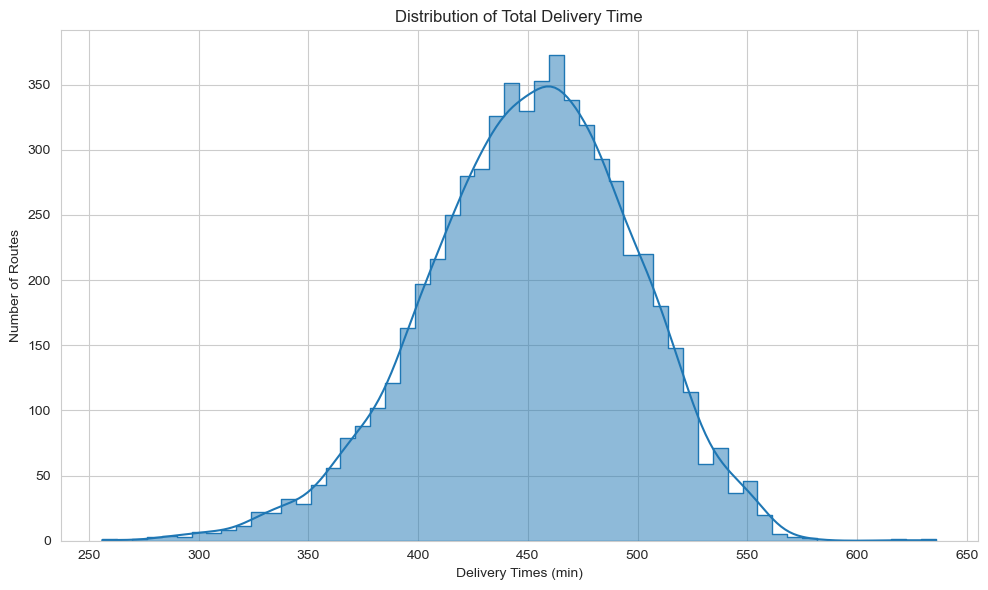

In [114]:
# Plot distribution of delivery time
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Delivery Time(min)', element='step', kde=True)
plt.title('Distribution of Total Delivery Time')
plt.xlabel('Delivery Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

In [115]:
# Basic Statistics of Total Delivery Time by route scores
df.groupby(['route_score'])['Total Delivery Time(min)'].describe().transpose()

route_score    High    Low  Medium
count       2718.00 102.00 3292.00
mean         444.35 468.35  455.76
std           48.37  47.37   45.13
min          282.54 340.29  256.01
25%          412.55 435.66  426.32
50%          447.22 475.37  457.55
75%          477.39 500.00  487.81
max          566.78 636.08  617.91

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

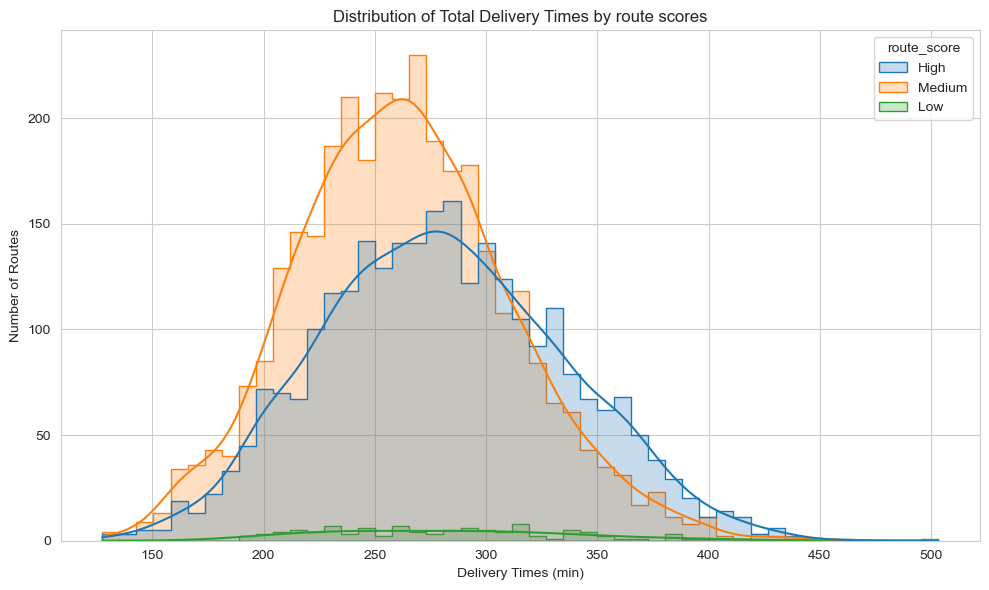

In [116]:
# Plot distribution of delivery time by route scores
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Service Time(min)',hue='route_score', element='step', kde=True)
plt.title('Distribution of Total Delivery Times by route scores')
plt.xlabel('Delivery Times (min)')
plt.ylabel('Number of Routes')
plt.tight_layout()
plt.show()

#### Service times for routes with/ without specified time windows

In [117]:
df.columns

Index(['station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'route_score', 'stops', 'station_code_grouped',
       'weekday', 'departure_hour', 'Package_Count', 'time_window_start',
       'time_window_end', 'num_specified_time_windows',
       'num_specified_time_windows(%)', 'Total Volume', 'Used Capacity',
       'Total Service Time', 'Total Service Time(min)', 'num_rejected',
       'num_delivered', 'num_delivery_attempted', 'latitude', 'longitude',
       'type', 'zone_id', 'num_stops', 'Total Travel Time',
       'Total Travel Time(min)', 'Total Delivery Time(min)',
       'Travel_Time/Delivery_Time', 'Service_Time/Delivery_Time'],
      dtype='object')

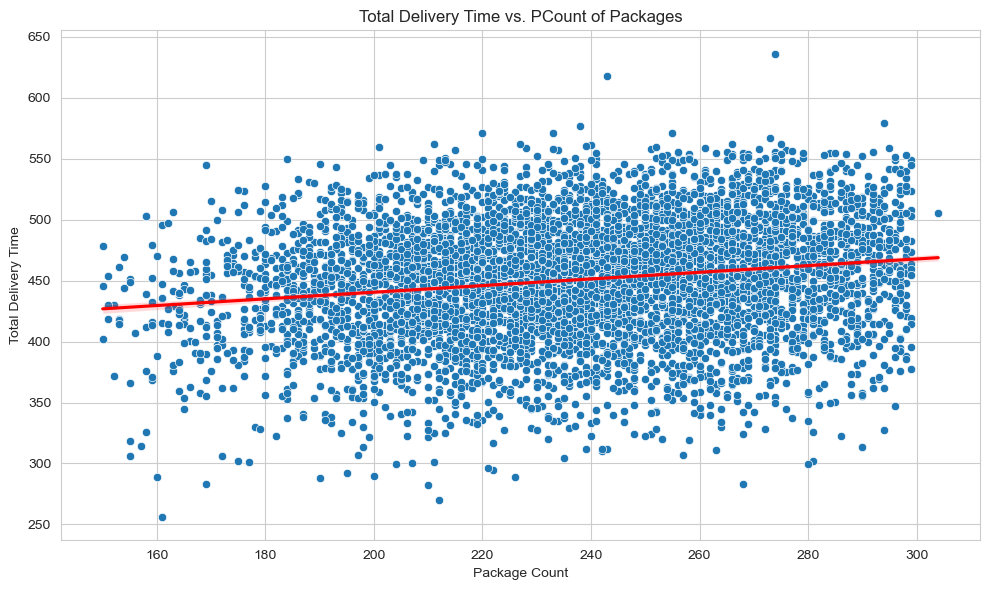

In [118]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Package_Count', y='Total Delivery Time(min)')
sns.regplot(data=df, x='Package_Count', y='Total Delivery Time(min)', scatter=False, color='red')  # Line of best fit
plt.title('Total Delivery Time vs. PCount of Packages')
plt.xlabel('Package Count')
plt.ylabel('Total Delivery Time')
plt.tight_layout()
plt.show()

### Route Visualization

In [119]:
def extract_zone_components(zone_id):
    if isinstance(zone_id, list):
        zone_prefix = []
        zone_number1 = []
        zone_number2 = []
        zone_suffix = []
        for item in zone_id:
            if isinstance(item, str):
                parts = item.split('-')
                if len(parts) == 2:
                    zone_prefix.append(parts[0])
                    parts = parts[1].split('.')
                    if len(parts) == 2:
                        zone_number1.append(parts[0])
                        if len(parts[1]) >= 2:
                            zone_number2.append(parts[1][0])
                            zone_suffix.append(parts[1][1])
                        else:
                            zone_number2.append(None)
                            zone_suffix.append(None)
                    else:
                        zone_number1.append(None)
                        zone_number2.append(None)
                        zone_suffix.append(None)
                else:
                    zone_prefix.append(None)
                    zone_number1.append(None)
                    zone_number2.append(None)
                    zone_suffix.append(None)
            else:
                zone_prefix.append(None)
                zone_number1.append(None)
                zone_number2.append(None)
                zone_suffix.append(None)
        return zone_prefix, zone_number1, zone_number2, zone_suffix
    else:
        return None, None, None, None

In [120]:
df['zone_prefix'], df['zone_number1'], df['zone_number2'], df['zone_suffix'] = zip(*df['zone_id'].apply(extract_zone_components))

In [121]:
unique_zone_suffixes = df['zone_suffix'].explode().unique()
unique_zone_prefixes = df['zone_prefix'].explode().unique()
unique_zone_number1 = df['zone_number1'].explode().unique()
unique_zone_number2 = df['zone_number2'].explode().unique()
print(f'unique zone suffixes:\n {unique_zone_suffixes}\n')
print(f'unique zone prefixes:\n {unique_zone_prefixes}\n')
print(f'unique zone number 1:\n {unique_zone_number1}\n')
print(f'unique zone number 2:\n {unique_zone_number2}\n')

unique zone suffixes:
 [None 'A' 'B' 'C' 'D' 'E' 'G' 'H' 'J' 'K' 'L' 'M' 'S' 'Q' 'P']

unique zone prefixes:
 [None 'A' 'P' 'D' 'B' 'C' 'O' 'H' 'M' 'G' 'J' 'E' 'L' 'K' 'R' 'F' 'Q' 'T'
 'S']

unique zone number 1:
 [None '2' '1' '13' '12' '3' '11' '17' '18' '24' '23' '36' '7' '10' '25'
 '27' '32' '33' '5' '6' '8' '34' '31' '30' '29' '4' '22' '21' '35' '26'
 '9' '14' '15' '16' '19' '20' '37' '38' '28']

unique zone number 2:
 [None '2' '1' '3']



In [122]:
df['station_code_grouped'].unique()

array(['DLA', 'DSE', 'DCH', 'DBO', 'DAU'], dtype=object)

In [123]:
df_DLA = df.loc[df['station_code_grouped']=='DLA']
df_DSE = df.loc[df['station_code_grouped']=='DSE']
df_DCH = df.loc[df['station_code_grouped']=='DCH']
df_DBO = df.loc[df['station_code_grouped']=='DBO']
df_DAU = df.loc[df['station_code_grouped']=='DAU']

In [124]:
# Create a Folium map for LA: zone prefix and zone_number2
map_routes = folium.Map(location=[df_DLA['latitude'][0][0], df_DLA['longitude'][0][0]], zoom_start=10)

# Define color mapping for zone_prefix
color_mapping = {
    'A': 'red',
    'P': 'purple',
    'D': 'gray',
    'B': 'blue',
    'C': 'green',
    'O': 'orange',
    'H': 'cyan',
    'M': 'magenta',
    'G': 'gold',
    'J': 'brown',
    'E': 'pink',
    'L': 'silver',
    'K': 'olive',
    'R': 'navy',
    'F': 'teal',
    'Q': 'lime',
    'T': 'aqua',
    'S': 'fuchsia'
}

# Iterate over each row of the DataFrame
for index, row in df_DLA.iloc[:5,:].iterrows():
    # Extract latitude and longitude coordinates
    coordinates = list(zip(row['latitude'], row['longitude']))
    
    # Create a polyline using coordinates
    polyline = folium.PolyLine(locations=coordinates, color='black',tooltip=index)
    
    # Add polyline to the map
    map_routes.add_child(polyline)
    
    # Add markers along the route
    for lat, lon, zone_prefix, zone_number1 in zip(row['latitude'], row['longitude'], row['zone_prefix'], row['zone_number1']):
        folium.Marker(location=[lat, lon], icon=plugins.BeautifyIcon(icon="arrow-down",icon_shape="marker", number= zone_number1, background_color=color_mapping.get(zone_prefix))).add_to(map_routes)

# Display the map
map_routes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19032\1443017871.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  map_routes = folium.Map(location=[df_DLA['latitude'][0][0], df_DLA['longitude'][0][0]], zoom_start=10)


In [125]:
# Create a Folium map for LA to visualize suffix and zone_number2
map_routes = folium.Map(location=[df_DLA['latitude'][0][0], df_DLA['longitude'][0][0]], zoom_start=10)

# Define color mapping for zone_prefix
color_mapping = {
    'A': '#FF5733',  # Red
    'B': '#3399FF',  # Blue
    'C': '#33CC33',  # Green
    'D': '#808080',  # Gray
    'E': '#FF69B4',  # Pink
    'G': '#FFD700',  # Gold
    'H': '#00FFFF',  # Cyan
    'J': '#8B4513',  # Brown
    'K': '#808080',  # Silver
    'L': '#C0C0C0',  # Olive
    'M': '#FF00FF',  # Magenta
    'P': '#800080',  # Purple
    'Q': '#ADFF2F',  # Lime
    'S': '#FF00FF'   # Fuchsia
}

# Iterate over each row of the DataFrame
for index, row in df_DLA.iloc[:5,:].iterrows():
    # Extract latitude and longitude coordinates
    coordinates = list(zip(row['latitude'], row['longitude']))
    
    # Create a polyline using coordinates
    polyline = folium.PolyLine(locations=coordinates, color='black',tooltip=index)
    
    # Add polyline to the map
    map_routes.add_child(polyline)
    
    # Add markers along the route
    for lat, lon, zone_suffix, zone_number2 in zip(row['latitude'], row['longitude'], row['zone_suffix'], row['zone_number2']):
        folium.Marker(location=[lat, lon], icon=plugins.BeautifyIcon(icon="arrow-down",icon_shape="marker", number= zone_number2, background_color=color_mapping.get(zone_suffix))).add_to(map_routes)

# Display the map
map_routes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19032\649039145.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  map_routes = folium.Map(location=[df_DLA['latitude'][0][0], df_DLA['longitude'][0][0]], zoom_start=10)


In [126]:
# Create a Folium map Seattle: zone_prefix and zone_number1
map_routes = folium.Map(location=[df_DSE['latitude'][0][0], df_DSE['longitude'][0][0]], zoom_start=10)

# Define color mapping for zone_prefix
color_mapping = {
    'P': 'purple',
    'A': 'red',
    'D': 'gray',
    'B': 'blue',
    'C': 'green'}

# Iterate over each row of the DataFrame
for index, row in df_DSE.iloc[:5,:].iterrows():
    # Extract latitude and longitude coordinates
    coordinates = list(zip(row['latitude'], row['longitude']))
    
    # Create a polyline using coordinates
    polyline = folium.PolyLine(locations=coordinates, color='black',tooltip=index)
    
    # Add polyline to the map
    map_routes.add_child(polyline)
    
    # Add markers along the route
    for lat, lon, zone_prefix, zone_number1 in zip(row['latitude'], row['longitude'], row['zone_prefix'], row['zone_number1']):
        folium.Marker(location=[lat, lon], icon=plugins.BeautifyIcon(icon="arrow-down",icon_shape="marker", number= zone_number1, background_color=color_mapping.get(zone_prefix))).add_to(map_routes)

# Display the map
map_routes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19032\2713000260.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  map_routes = folium.Map(location=[df_DSE['latitude'][0][0], df_DSE['longitude'][0][0]], zoom_start=10)


## Correlation between features

In [127]:
df.columns

Index(['station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'route_score', 'stops', 'station_code_grouped',
       'weekday', 'departure_hour', 'Package_Count', 'time_window_start',
       'time_window_end', 'num_specified_time_windows',
       'num_specified_time_windows(%)', 'Total Volume', 'Used Capacity',
       'Total Service Time', 'Total Service Time(min)', 'num_rejected',
       'num_delivered', 'num_delivery_attempted', 'latitude', 'longitude',
       'type', 'zone_id', 'num_stops', 'Total Travel Time',
       'Total Travel Time(min)', 'Total Delivery Time(min)',
       'Travel_Time/Delivery_Time', 'Service_Time/Delivery_Time',
       'zone_prefix', 'zone_number1', 'zone_number2', 'zone_suffix'],
      dtype='object')

### Separate categorical and numerical features

In [128]:
# Separate features
X_num = df[['Package_Count','num_specified_time_windows','num_specified_time_windows(%)','Total Volume',
            'Used Capacity','Total Service Time(min)','num_rejected','num_delivered','num_delivery_attempted','num_stops',
            'Total Travel Time(min)','Total Delivery Time(min)','Travel_Time/Delivery_Time']]
X_cat = df[['station_code','executor_capacity_cm3','station_code_grouped','departure_hour','weekday']]

y = df[['route_score']]

#### Correlation matrix for numerical features

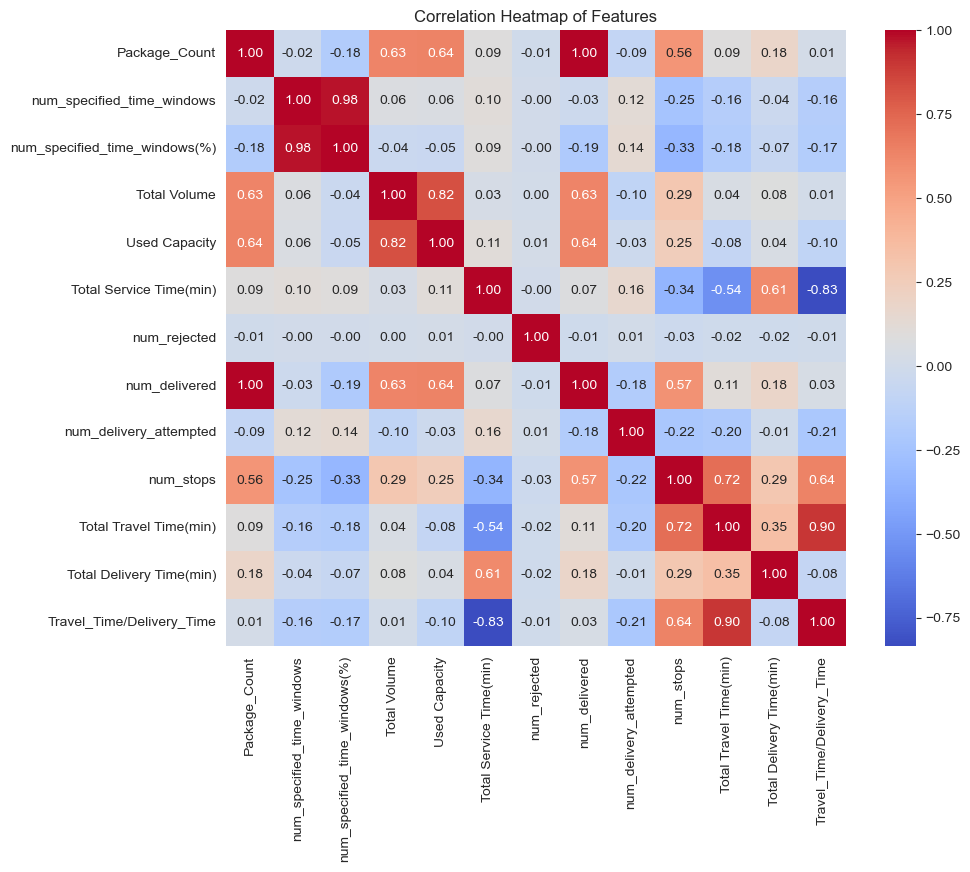

In [129]:
# Calculate correlation matrix
correlation_matrix = X_num.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [702]:
# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit and transform the data
# X_num_scaled = scaler.fit_transform(X_num)

# # Convert the scaled features back to a DataFrame
# X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

#### Correlation matrix for categorical features

In [130]:
# Define the Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [131]:
# Compute Cramér's V for each pair of categorical variables
X_cat_with_target = pd.concat([X_cat,y],axis=1)

cramers_matrix = pd.DataFrame(index=X_cat_with_target.columns, columns=X_cat_with_target.columns)
for i in X_cat_with_target.columns:
    for j in X_cat_with_target.columns:
        cramers_matrix.loc[i, j] = cramers_v(X_cat_with_target[i], X_cat_with_target[j])
cramers_matrix = cramers_matrix.astype(float)

<Axes: >

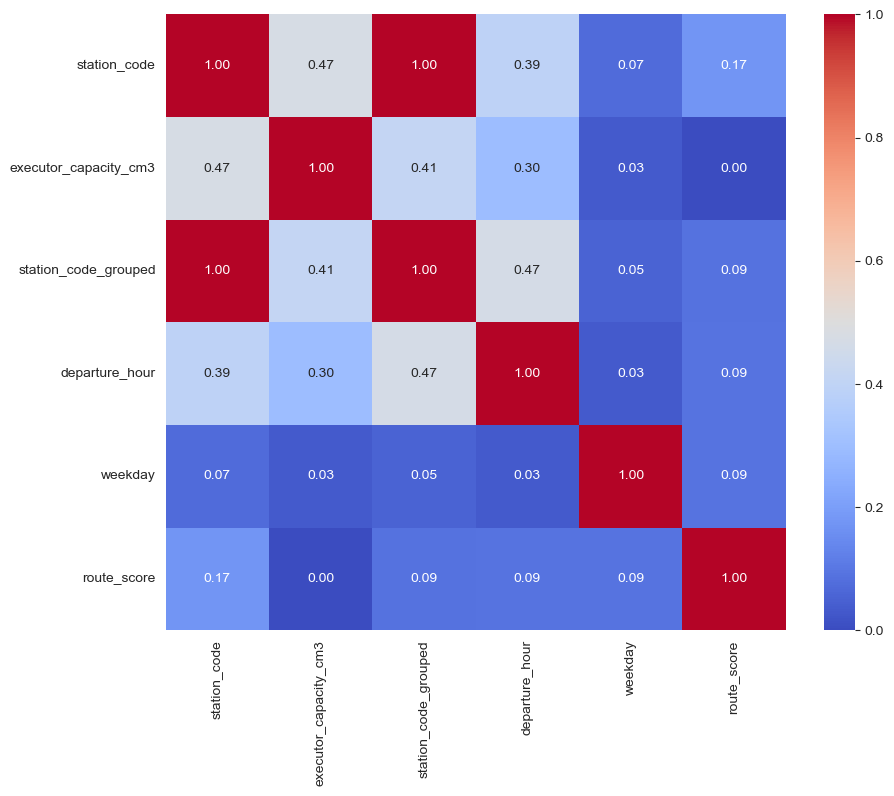

In [132]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [708]:
# # One-hot encode 'station_code_grouped' column
# X_cat_encoded = pd.get_dummies(X_cat, columns=['station_code','station_code_grouped','executor_capacity_cm3','departure_hour','weekday'])
# X_cat_encoded.head()

In [709]:
# # Calculate correlation matrix
# correlation_matrix = X_cat_encoded.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Features')
# plt.show()

## Clustering analysis

In [133]:
# Combine categorical and numerical features previously separated
X = pd.concat([X_num,X_cat],axis=1)
X.shape

(6112, 18)

In [134]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (4278, 18)
X_test: (1834, 18)
y_train: (4278, 1)
y_test: (1834, 1)


In [135]:
# Separate features
X_train_num = X_train[['Package_Count','num_specified_time_windows','num_specified_time_windows(%)','Total Volume',
            'Used Capacity','Total Service Time(min)','num_rejected','num_delivered','num_delivery_attempted','num_stops',
            'Total Travel Time(min)','Total Delivery Time(min)','Travel_Time/Delivery_Time']]
X_train_cat = X_train[['station_code','executor_capacity_cm3','station_code_grouped','weekday']]
print(f'X_train_num: {X_train_num.shape}')
print(f'X_train_cat: {X_train_cat.shape}')

X_train_num: (4278, 13)
X_train_cat: (4278, 4)


In [136]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_num_scaled = scaler.fit_transform(X_train_num)

# Convert the scaled features back to a DataFrame
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

print(f'X_train_num_scaled: {X_train_num_scaled.shape}')

X_train_num_scaled: (4278, 13)


In [137]:
# One-hot encode categorical features
X_train_cat_encoded = pd.get_dummies(X_train_cat, columns=['station_code','station_code_grouped','executor_capacity_cm3','weekday'])
print(f'X_train_cat_encoded: {X_train_cat_encoded.shape}')

X_train_cat_encoded: (4278, 32)


In [138]:
X_train_num_scaled.reset_index(drop=True, inplace=True)
X_train_cat_encoded.reset_index(drop=True, inplace=True)

X_train_final = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
print(f'X_train_final: {X_train_final.shape}')

X_train_final: (4278, 45)


In [139]:
# Calculate distortion for a range of cluster numbers
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_final)
    distortions.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

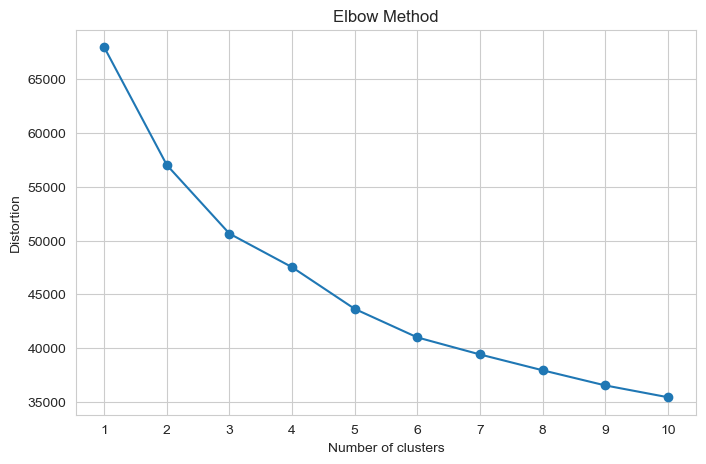

In [140]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Optimal number of clusters will be 3

In [141]:
# Assign number of clusters as 3 and fit to X_train_final
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_final)

# Obtain cluster labels for each data point
cluster_labels = kmeans.predict(X_train_final)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [142]:
# Perform PCA to visualize data
pca = PCA(n_components=2)  # Reduce the data to 2 dimensions
X_pca = pca.fit_transform(X_train_final)

In [143]:
df_pca = pd.DataFrame(X_pca,columns=['PC1','PC2'])
df_pca['cluster_label'] = cluster_labels
df_pca['route_score'] = y_train['route_score'].values

df_pca.head()

PC1   PC2  cluster_label route_score
0 -2.10 -0.67              0      Medium
1  1.84  1.25              1        High
2 -3.88 -0.36              0        High
3 -0.65 -0.29              0      Medium
4 -2.97  0.50              0        High

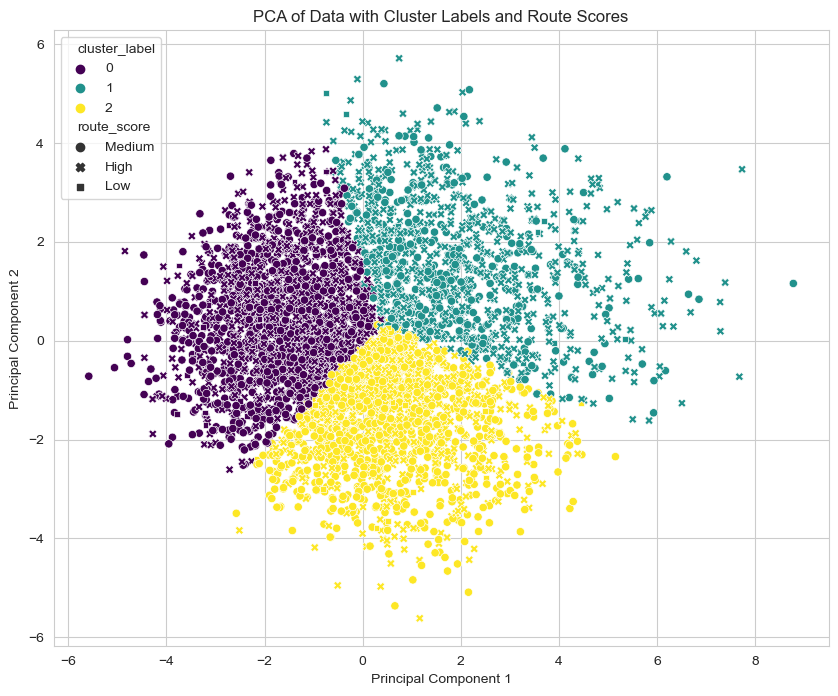

In [144]:
# Plot the data colored by both cluster label and route score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', style='route_score', data=df_pca, palette='viridis', legend='full')
plt.title('PCA of Data with Cluster Labels and Route Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [145]:
# Add cluster labels to X_train_final
X_train_final['cluster_label'] = cluster_labels

In [146]:
# Produce a pivot table to see route_score distributions for each cluster_label
pivot_table = df_pca.pivot_table(index='cluster_label', columns='route_score', aggfunc='size', fill_value=0)
display(pivot_table)

route_score    High  Low  Medium
cluster_label                   
0               732   40    1023
1               678   10     362
2               482   30     921

In [147]:
X_train_cluster = X_train.copy()
X_train_cluster['cluster_label'] = cluster_labels

In [148]:
X_train_cluster.columns

Index(['Package_Count', 'num_specified_time_windows',
       'num_specified_time_windows(%)', 'Total Volume', 'Used Capacity',
       'Total Service Time(min)', 'num_rejected', 'num_delivered',
       'num_delivery_attempted', 'num_stops', 'Total Travel Time(min)',
       'Total Delivery Time(min)', 'Travel_Time/Delivery_Time', 'station_code',
       'executor_capacity_cm3', 'station_code_grouped', 'departure_hour',
       'weekday', 'cluster_label'],
      dtype='object')

In [149]:
X_train_cluster.groupby(['cluster_label'])[['num_specified_time_windows','num_stops']].describe()

num_specified_time_windows                                     \
                                   count  mean   std  min   25%   50%   75%   
cluster_label                                                                 
0                                1795.00 15.91 13.04 1.00  6.00 12.00 23.00   
1                                1050.00 28.57 18.61 1.00 14.00 26.00 41.00   
2                                1433.00 15.32 11.84 1.00  6.00 13.00 22.00   

                     num_stops                                                 
                 max     count   mean   std   min    25%    50%    75%    max  
cluster_label                                                                  
0              71.00   1795.00 170.22 19.59 98.00 157.00 172.00 184.00 238.00  
1             102.00   1050.00 111.87 25.78 33.00  94.00 114.00 130.00 169.00  
2              63.00   1433.00 146.09 19.74 80.00 134.00 147.00 160.00 199.00

In [150]:
X_train_cluster.groupby(['cluster_label'])[['num_delivered','Total Service Time(min)']].describe()

num_delivered                                                  \
                      count   mean   std    min    25%    50%    75%    max   
cluster_label                                                                 
0                   1795.00 262.23 18.39 202.00 249.00 263.00 276.00 299.00   
1                   1050.00 225.47 29.91 128.00 207.00 227.00 246.00 299.00   
2                   1433.00 212.83 21.45 147.00 199.00 215.00 228.00 266.00   

              Total Service Time(min)                                    \
                                count   mean   std    min    25%    50%   
cluster_label                                                             
0                             1795.00 266.83 43.89 138.84 237.14 267.13   
1                             1050.00 320.86 46.59 184.73 289.72 322.01   
2                             1433.00 242.77 40.22 127.57 214.52 242.63   

                             
                 75%    max  
cluster_label                
0             295.29 391.85  
1             353.62 503.12  
2             271.21 363.71

In [151]:
X_train_cluster.groupby(['cluster_label'])[['Total Travel Time(min)','Package_Count']].describe()

Total Travel Time(min)                                           \
                               count   mean   std    min    25%    50%    75%   
cluster_label                                                                   
0                            1795.00 194.60 32.97  94.21 173.07 192.18 217.27   
1                            1050.00 126.19 31.82  46.03 103.01 123.50 148.45   
2                            1433.00 198.66 32.66 104.29 176.61 197.00 222.02   

                     Package_Count                                           \
                 max         count   mean   std    min    25%    50%    75%   
cluster_label                                                                 
0             305.52       1795.00 263.42 18.33 204.00 250.00 264.00 277.00   
1             233.54       1050.00 228.80 29.12 150.00 210.00 231.00 248.00   
2             335.20       1433.00 214.19 21.30 150.00 200.00 216.00 230.00   

                      
                 max  
cluster_label         
0             304.00  
1             299.00  
2             273.00

In [152]:
X_train_cluster.groupby(['cluster_label'])[['Used Capacity']].agg(['count', 'nunique', 'min', 'max','mean'])

Used Capacity                       
                      count nunique  min  max mean
cluster_label                                     
0                      1795    1795 0.52 1.04 0.84
1                      1050    1050 0.33 1.01 0.73
2                      1433    1433 0.35 0.99 0.62

In [153]:
X_train_cluster.groupby(['cluster_label'])[['num_rejected']].agg(['count', 'nunique', 'min', 'max','mean'])

num_rejected                     
                     count nunique min max mean
cluster_label                                  
0                     1795       2   0   1 0.01
1                     1050       3   0   2 0.01
2                     1433       3   0   2 0.00

In [154]:
X_train_cluster2 = X_train_cluster.copy()
X_train_cluster2['Package_per_stop'] = X_train_cluster2['Package_Count']/X_train_cluster2['num_stops']

In [155]:
X_train_cluster2.groupby(['cluster_label'])[['Package_per_stop']].describe()

Package_per_stop                                   
                         count mean  std  min  25%  50%  75%  max
cluster_label                                                    
0                      1795.00 1.57 0.19 1.23 1.43 1.52 1.65 2.73
1                      1050.00 2.15 0.57 1.38 1.76 2.03 2.35 7.12
2                      1433.00 1.48 0.17 1.15 1.37 1.45 1.56 2.65

## Model Implementation

### Process test features

In [156]:
# Separate features
X_test_num = X_test[['Package_Count','num_specified_time_windows','num_specified_time_windows(%)','Total Volume',
            'Used Capacity','Total Service Time(min)','num_rejected','num_delivered','num_delivery_attempted','num_stops',
            'Total Travel Time(min)','Total Delivery Time(min)','Travel_Time/Delivery_Time']]
X_test_cat = X_test[['station_code','executor_capacity_cm3','station_code_grouped','weekday']]

In [157]:
# Transform the test numerical features
X_test_num_scaled = scaler.transform(X_test_num)

# Convert the scaled features back to a DataFrame
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

In [158]:
# One-hot encode categorical features
X_test_cat_encoded = pd.get_dummies(X_test_cat, columns=['station_code','station_code_grouped','executor_capacity_cm3','weekday'])

In [159]:
X_test_num_scaled.reset_index(drop=True, inplace=True)
X_test_cat_encoded.reset_index(drop=True, inplace=True)

X_test_final = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [160]:
# Obtain cluster labels for each data point
test_cluster_labels = kmeans.predict(X_test_final)

In [161]:
# Add cluster labels to X_test_final
X_test_final['cluster_label'] = test_cluster_labels

### Gradient Boosting Classifier

In [198]:
# Initialize the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_train_final, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [199]:
# Get predictions on training set
y_train_pred = gbc.predict(X_train_final)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1 = f1_score(y_train,y_train_pred,average='weighted')

print("Accuracy:", train_accuracy)
print('Precision:', train_precision)
print('Recall:', train_recall)
print('F1 score:', train_f1)

Accuracy: 0.7330528284244975
Precision: 0.740886622049895
Recall: 0.7330528284244975
F1 score: 0.7268696642879701


In [200]:
# Print classification report with metrics for each class
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

        High       0.76      0.60      0.67      1892
         Low       1.00      0.38      0.55        80
      Medium       0.71      0.85      0.78      2306

    accuracy                           0.73      4278
   macro avg       0.83      0.61      0.67      4278
weighted avg       0.74      0.73      0.73      4278



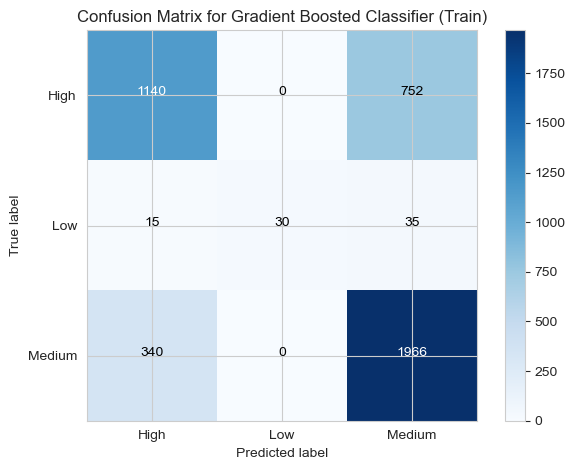

In [201]:
# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient Boosted Classifier (Train)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, np.unique(y_train))
plt.yticks(tick_marks, np.unique(y_train))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Print numbers in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [202]:
# Make predictions on the testing data
y_test_pred = gbc.predict(X_test_final)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1 = f1_score(y_test,y_test_pred,average='weighted')

print("Accuracy:", test_accuracy)
print('Precision:', test_precision)
print('Recall:', test_recall)
print('F1 score:', test_f1)

Accuracy: 0.648854961832061
Precision: 0.6427816799538232
Recall: 0.648854961832061
F1 score: 0.6373448672683222


In [203]:
# Print classification report with metrics for each class
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.66      0.50      0.57       826
         Low       0.00      0.00      0.00        22
      Medium       0.65      0.79      0.71       986

    accuracy                           0.65      1834
   macro avg       0.43      0.43      0.43      1834
weighted avg       0.64      0.65      0.64      1834



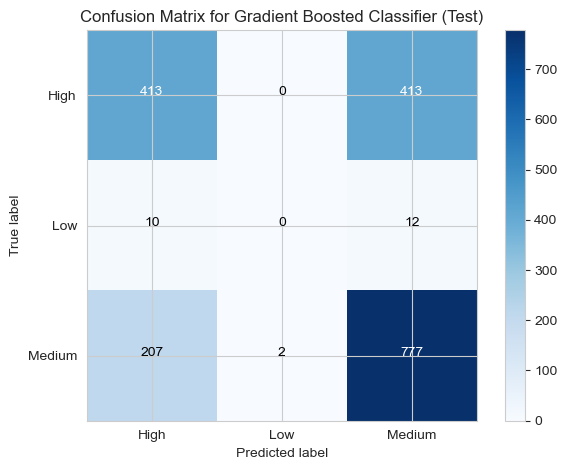

In [204]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient Boosted Classifier (Test)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Print numbers in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

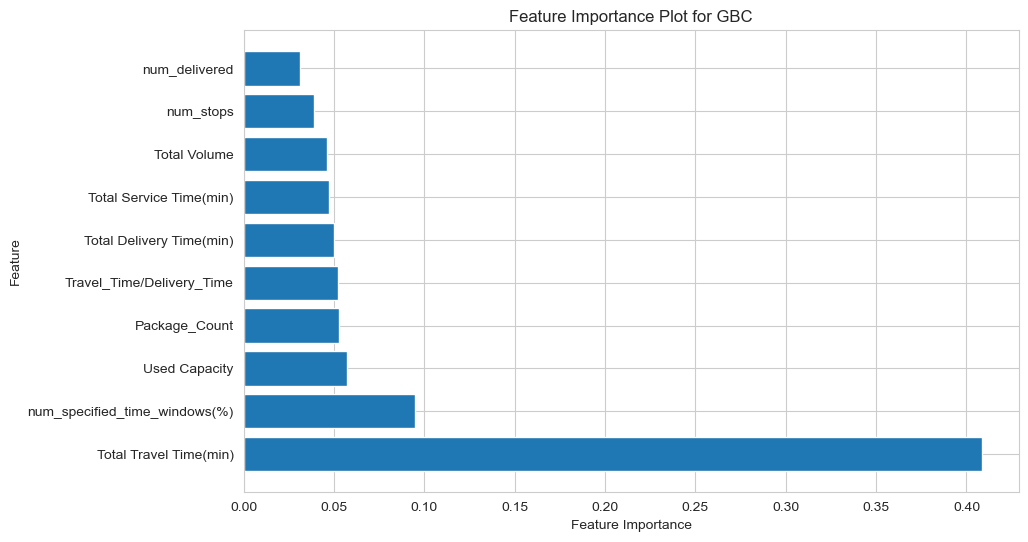

In [205]:
# Get feature importance and feature names
importances = gbc.feature_importances_
feature_names = X_train_final.columns

# Sort feature importance values and feature names from most to least important
sorted_indices = np.argsort(importances)[::-1]  # Get indices that sort importances in descending order
sorted_importances = importances[sorted_indices]  # Sort importances
sorted_feature_names = [feature_names[i] for i in sorted_indices]  # Sort feature names accordingly

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), sorted_importances[:10], align='center')
plt.yticks(np.arange(10), sorted_feature_names[:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot for GBC")
plt.show()

### Random Forest Classifier

In [206]:
# Initialize the Random Forest Classifier model
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train_final, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [207]:
# Get predictions on training set
y_train_pred = rfc.predict(X_train_final)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train,y_train_pred,average='weighted')
train_recall = recall_score(y_train,y_train_pred,average='weighted')
train_f1 = f1_score(y_train,y_train_pred,average='weighted')

print("Accuracy:", train_accuracy)
print('Precision:', train_precision)
print('Recall:', train_recall)
print('F1 score:', train_f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [208]:
# Print classification report with metrics for each class
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1892
         Low       1.00      1.00      1.00        80
      Medium       1.00      1.00      1.00      2306

    accuracy                           1.00      4278
   macro avg       1.00      1.00      1.00      4278
weighted avg       1.00      1.00      1.00      4278



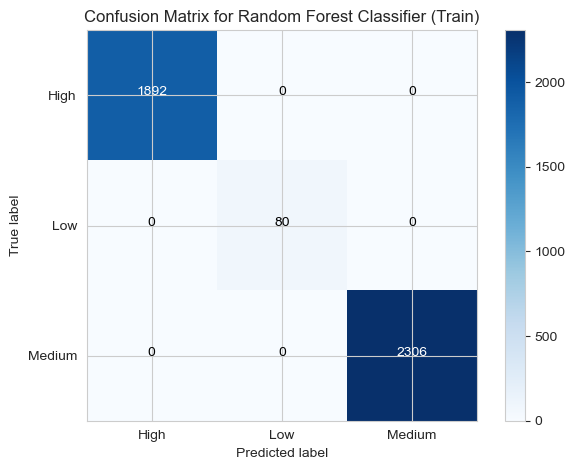

In [209]:
# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier (Train)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, np.unique(y_train))
plt.yticks(tick_marks, np.unique(y_train))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Print numbers in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [210]:
# Make predictions on the testing data
y_test_pred = rfc.predict(X_test_final)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test,y_test_pred,average='weighted')
test_recall = recall_score(y_test,y_test_pred,average='weighted')
test_f1 = f1_score(y_test,y_test_pred,average='weighted')

print("Accuracy:", test_accuracy)
print('Precision:', test_precision)
print('Recall:', test_recall)
print('F1 score:', test_f1)

Accuracy: 0.6477644492911668
Precision: 0.6396708933320974
Recall: 0.6477644492911668
F1 score: 0.6377697910106481


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
# Print classification report with metrics for each class
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.65      0.52      0.57       826
         Low       0.00      0.00      0.00        22
      Medium       0.65      0.77      0.70       986

    accuracy                           0.65      1834
   macro avg       0.43      0.43      0.43      1834
weighted avg       0.64      0.65      0.64      1834



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


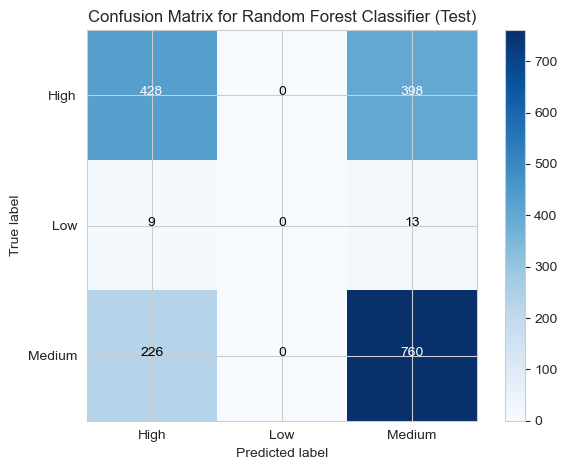

In [214]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier (Test)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Print numbers in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

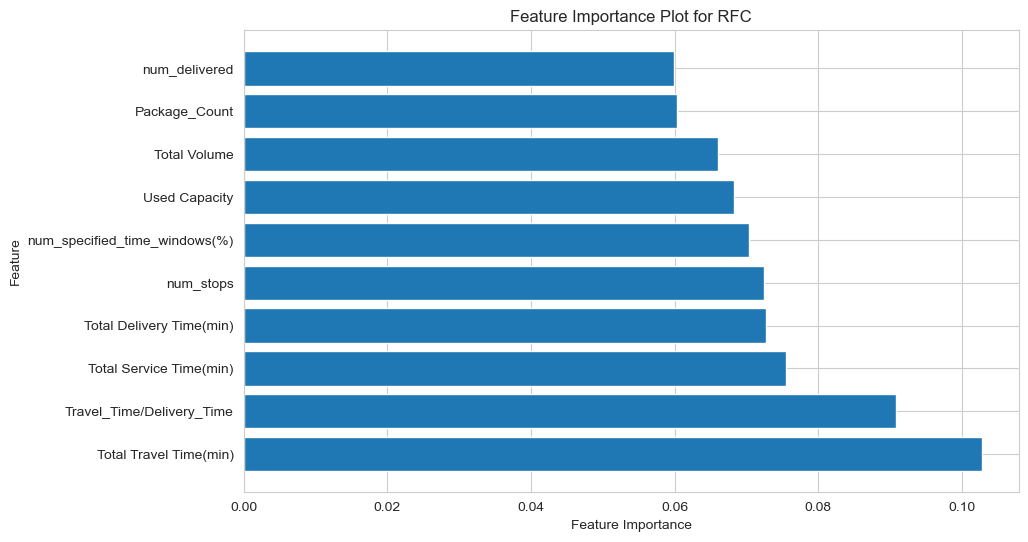

In [213]:
# Get feature importance and feature names
importances = rfc.feature_importances_
feature_names = X_train_final.columns

# Sort feature importance values and feature names from most to least important
sorted_indices = np.argsort(importances)[::-1]  # Get indices that sort importances in descending order
sorted_importances = importances[sorted_indices]  # Sort importances
sorted_feature_names = [feature_names[i] for i in sorted_indices]  # Sort feature names accordingly

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), sorted_importances[:10], align='center')
plt.yticks(np.arange(10), sorted_feature_names[:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot for RFC")
plt.show()